In [39]:
import gymnasium as gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import A2C  # Import A2C instead of SAC
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_checker import check_env

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar archivos CSV en DataFrames de pandas, especificando la primera columna como el índice
df_diario = pd.read_csv('fx_data\\GBPUSD_D1', sep=';', index_col=0)
df_15min = pd.read_csv('fx_data\\GBPUSD_15min', sep=';', index_col=0)

# Eliminar columnas con 'Unnamed' en su nombre
df_diario = df_diario.loc[:, ~df_diario.columns.str.contains('^Unnamed')]
df_15min = df_15min.loc[:, ~df_15min.columns.str.contains('^Unnamed')]

# Eliminar las columnas especificadas
columnas_a_eliminar = ['Time', 'Open', 'High', 'Low', 'Real_volume', 'Spread', 'timeframe', 'symbol']
df_diario = df_diario.drop(columns=columnas_a_eliminar)
df_15min = df_15min.drop(columns=columnas_a_eliminar)

# Crear copias de los DataFrames originales para normalización
df_diario_vol_norm = df_diario.copy()
df_15min_vol_norm = df_15min.copy()
df_diario_full_norm = df_diario.copy()
df_15min_full_norm = df_15min.copy()

# Normalizar la columna 'Volume'
escalador = MinMaxScaler()
df_diario_vol_norm['Volume'] = escalador.fit_transform(df_diario[['Volume']])
df_15min_vol_norm['Volume'] = escalador.fit_transform(df_15min[['Volume']])

# Normalizar las columnas 'Close' y 'Volume'
df_diario_full_norm[['Close', 'Volume']] = escalador.fit_transform(df_diario[['Close', 'Volume']])
df_15min_full_norm[['Close', 'Volume']] = escalador.fit_transform(df_15min[['Close', 'Volume']])

# Crear nuevos DataFrames con diferentes combinaciones de normalización
df_diario_sin_norm = df_diario[['Close', 'Volume']]
df_15min_sin_norm = df_15min[['Close', 'Volume']]

df_diario_vol_norm = df_diario_vol_norm[['Close', 'Volume']]
df_15min_vol_norm = df_15min_vol_norm[['Close', 'Volume']]

df_diario_full_norm = df_diario_full_norm[['Close', 'Volume']]
df_15min_full_norm = df_15min_full_norm[['Close', 'Volume']]

# Eliminar las dos primeras filas
df_diario_sin_norm = df_diario_sin_norm.iloc[2:].reset_index(drop=True)
df_15min_sin_norm = df_15min_sin_norm.iloc[2:].reset_index(drop=True)

df_diario_vol_norm = df_diario_vol_norm.iloc[2:].reset_index(drop=True)
df_15min_vol_norm = df_15min_vol_norm.iloc[2:].reset_index(drop=True)

df_diario_full_norm = df_diario_full_norm.iloc[2:].reset_index(drop=True)
df_15min_full_norm = df_15min_full_norm.iloc[2:].reset_index(drop=True)

# Imprimir las primeras filas de los diferentes DataFrames para evaluar
print("Diario - Sin Normalización")
print(df_diario_sin_norm.head())

print("\n15 Min - Sin Normalización")
print(df_15min_sin_norm.head())

print("\nDiario - Volumen Normalizado")
print(df_diario_vol_norm.head())

print("\n15 Min - Volumen Normalizado")
print(df_15min_vol_norm.head())

print("\nDiario - Volumen y Precio Normalizados")
print(df_diario_full_norm.head())

print("\n15 Min - Volumen y Precio Normalizados")
print(df_15min_full_norm.head())

Diario - Sin Normalización
     Close  Volume
0  1.35755  264578
1  1.35333  212521
2  1.35571  190496
3  1.35477  244345
4  1.35466  241101

15 Min - Sin Normalización
     Close  Volume
0  1.32760    1093
1  1.32766    1224
2  1.32921    1796
3  1.32794    2041
4  1.32850    1952

Diario - Volumen Normalizado
     Close    Volume
0  1.35755  0.856756
1  1.35333  0.675685
2  1.35571  0.599075
3  1.35477  0.786379
4  1.35466  0.775095

15 Min - Volumen Normalizado
     Close    Volume
0  1.32760  0.175817
1  1.32766  0.196909
2  1.32921  0.289003
3  1.32794  0.328450
4  1.32850  0.314120

Diario - Volumen y Precio Normalizados
      Close    Volume
0  0.820859  0.856756
1  0.808873  0.675685
2  0.815633  0.599075
3  0.812963  0.786379
4  0.812651  0.775095

15 Min - Volumen y Precio Normalizados
      Close    Volume
0  0.748184  0.175817
1  0.748341  0.196909
2  0.752375  0.289003
3  0.749069  0.328450
4  0.750527  0.314120


Datos originales - Diario
        Time    Close  Volume
0 2018-05-01  1.36140  203529
1 2018-05-02  1.35707  271314
2 2018-05-03  1.35755  264578
3 2018-05-04  1.35333  212521
4 2018-05-07  1.35571  190496

Datos originales - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos filtrados - Diario
        Time    Close  Volume
0 2018-05-01  1.36140  203529
1 2018-05-02  1.35707  271314
2 2018-05-03  1.35755  264578
3 2018-05-04  1.35333  212521
4 2018-05-07  1.35571  190496

Datos filtrados - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos sin duplicados - Diario
        Time    Close  Volum

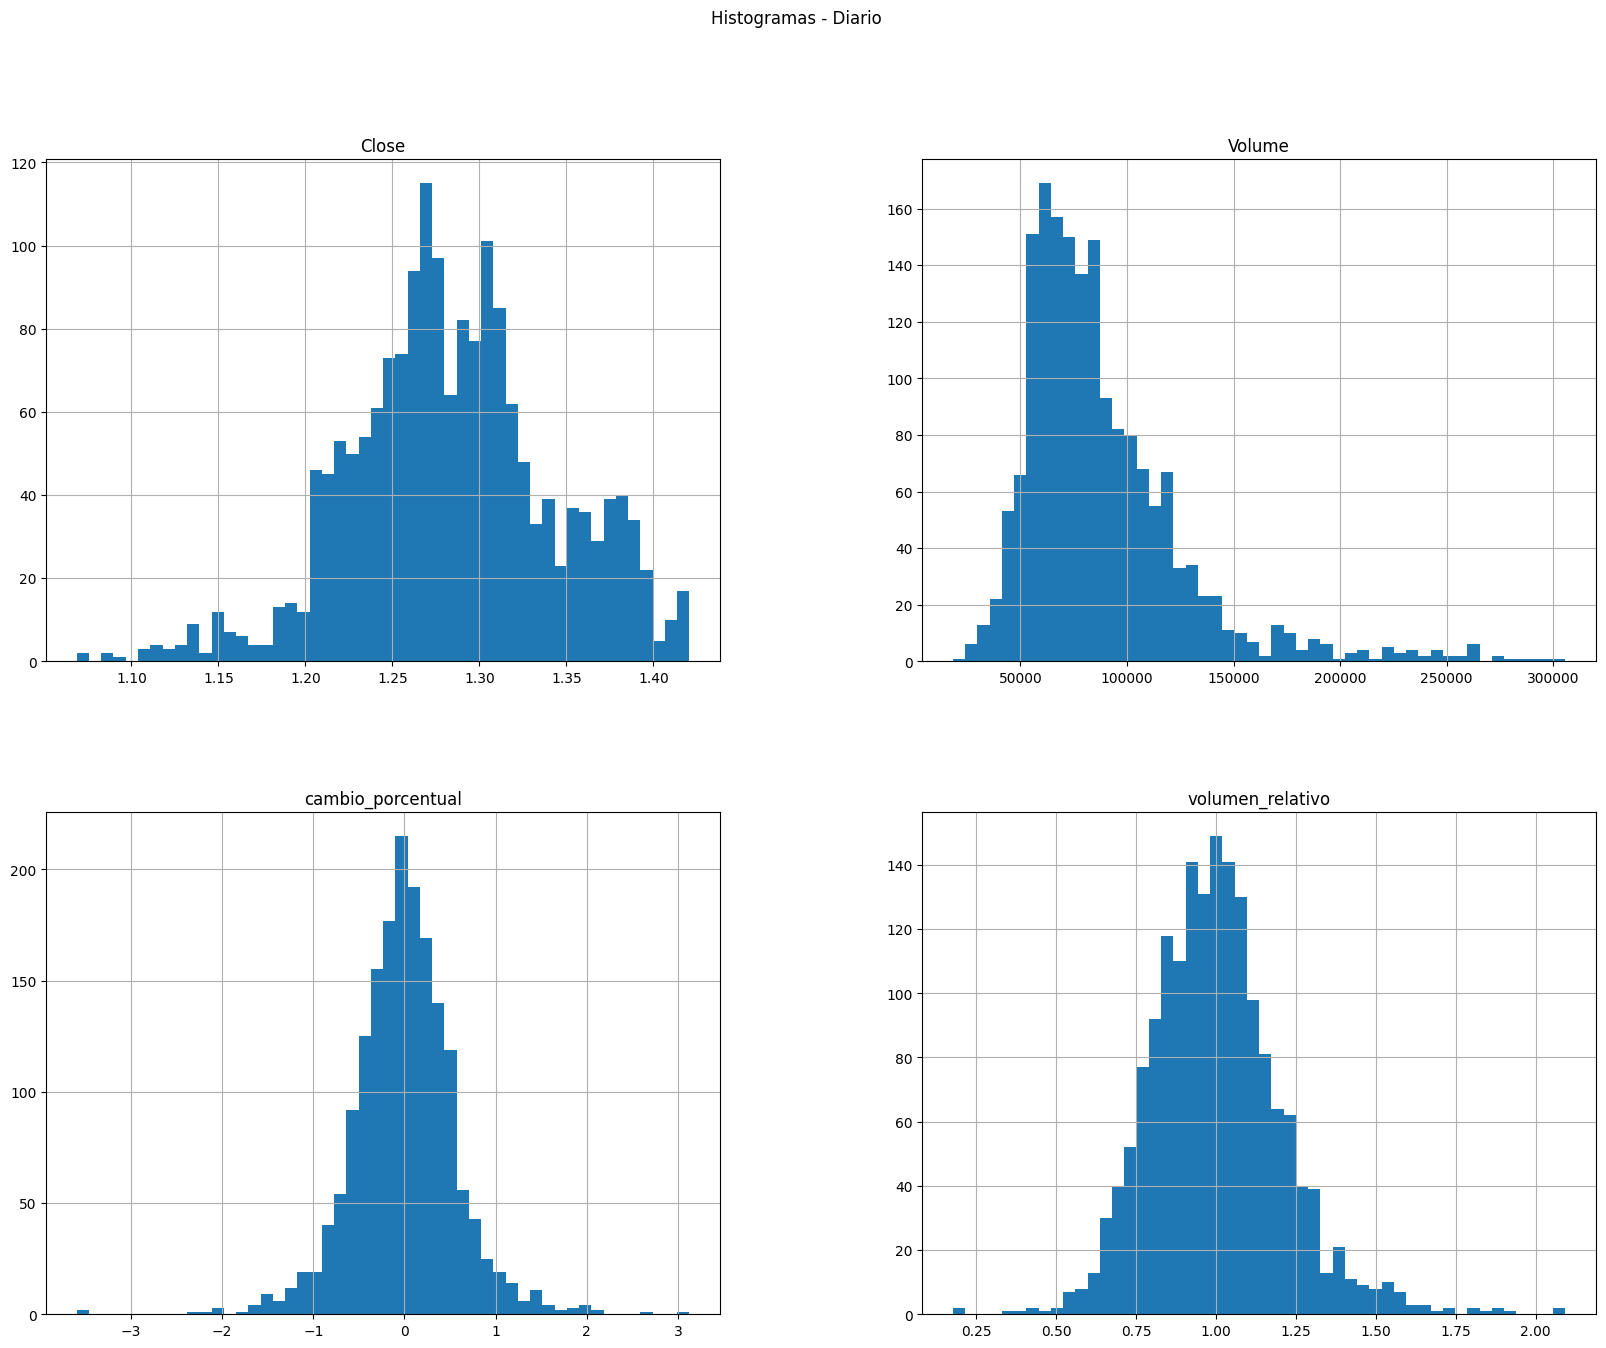

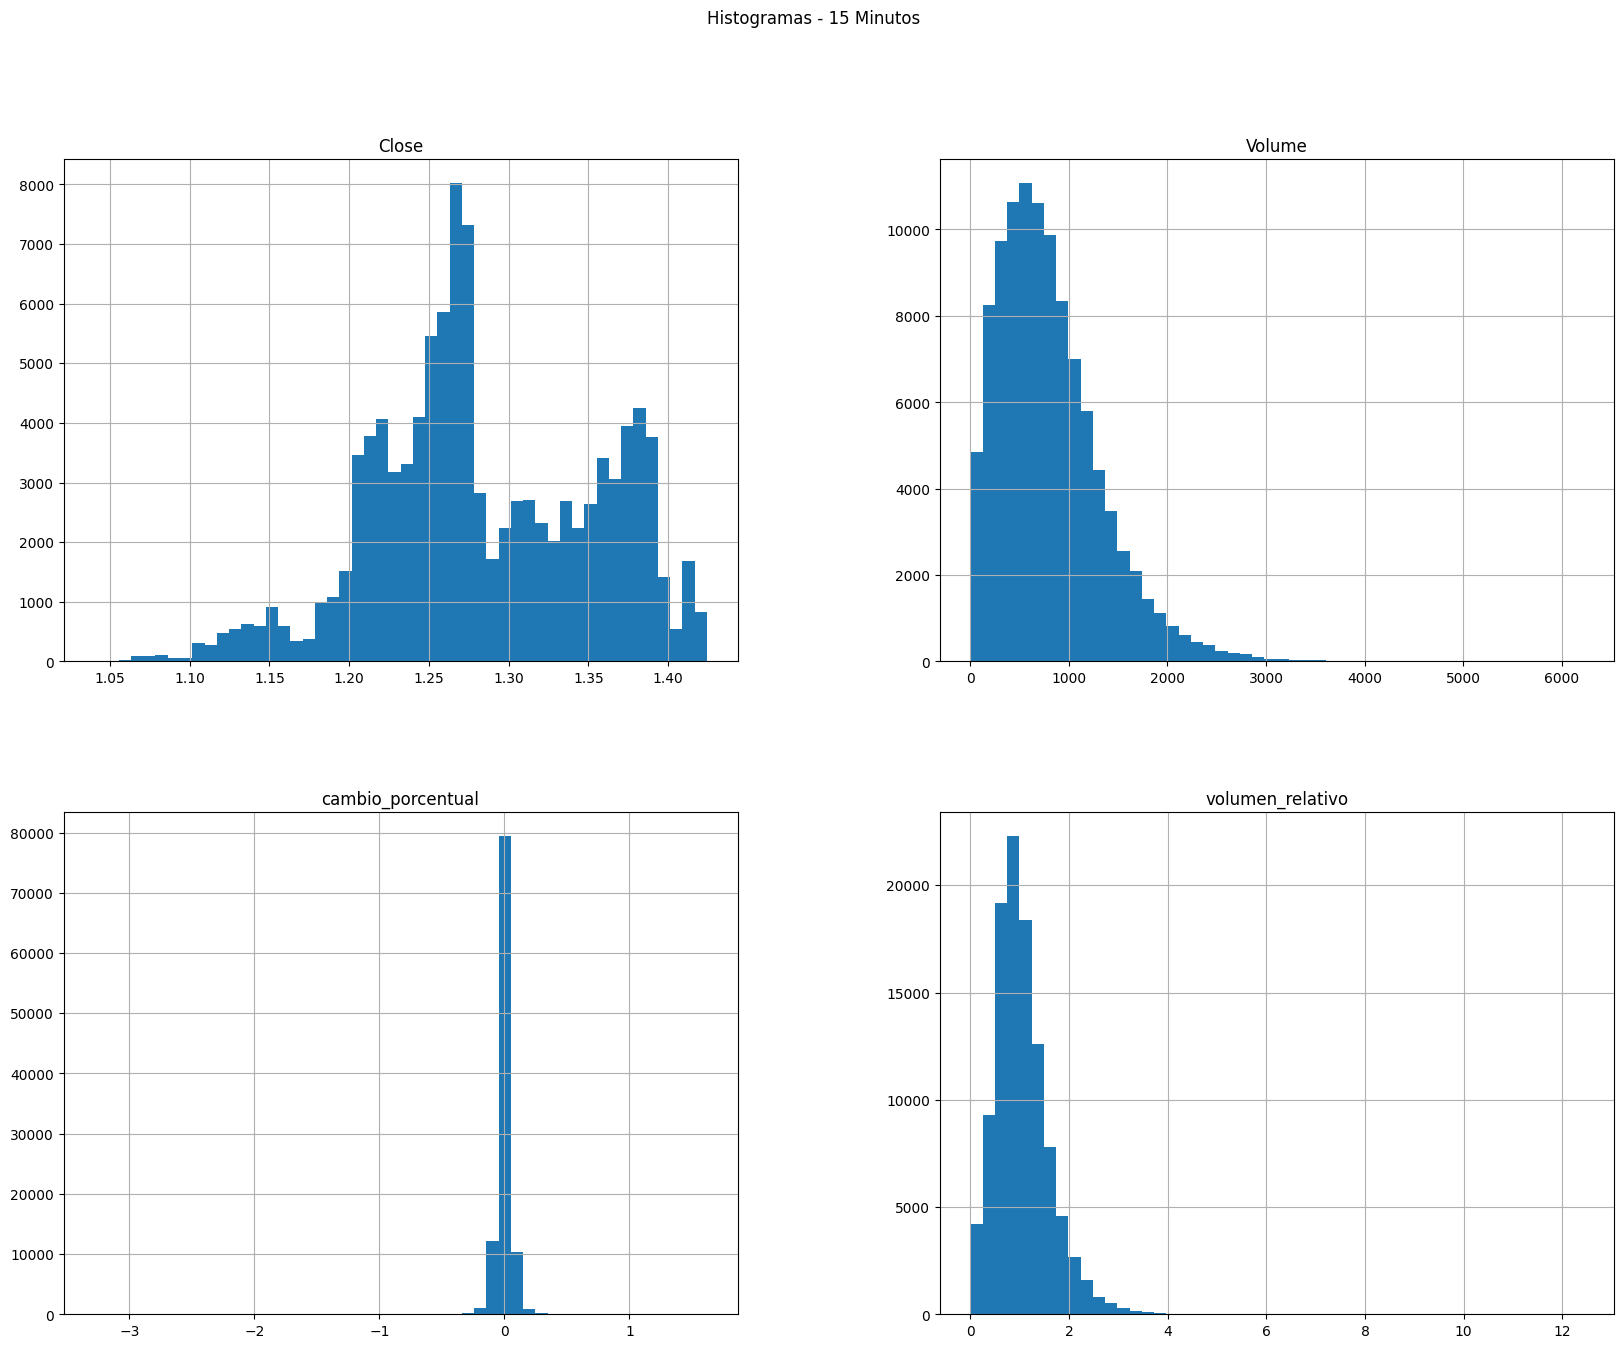

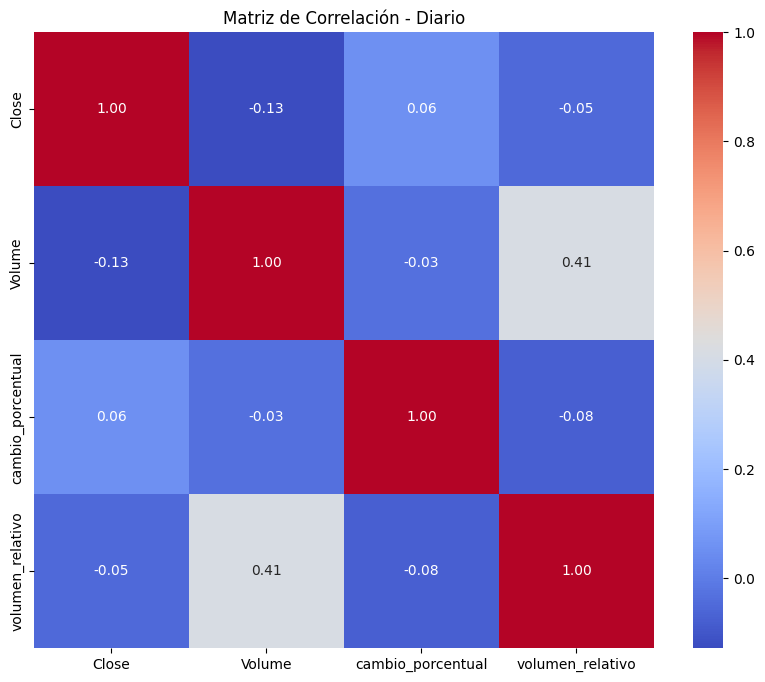

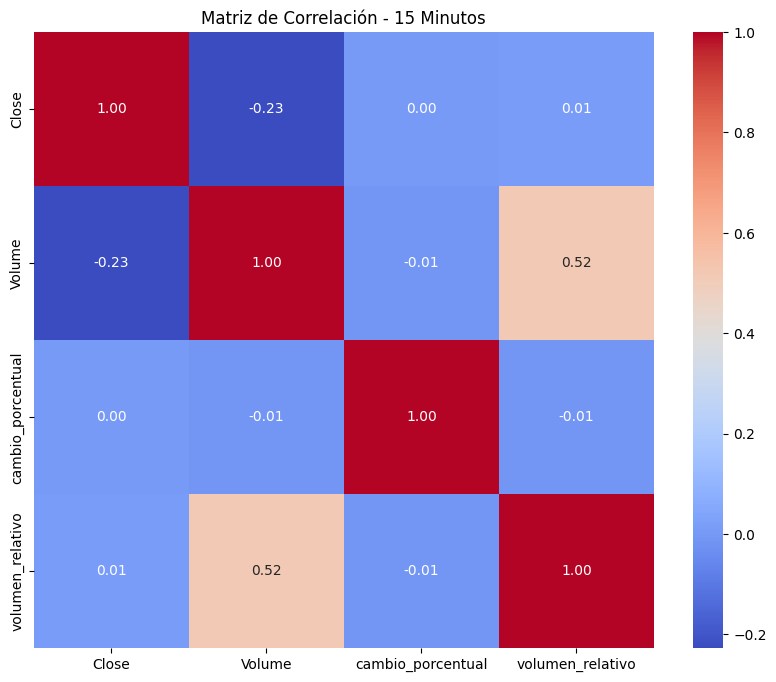

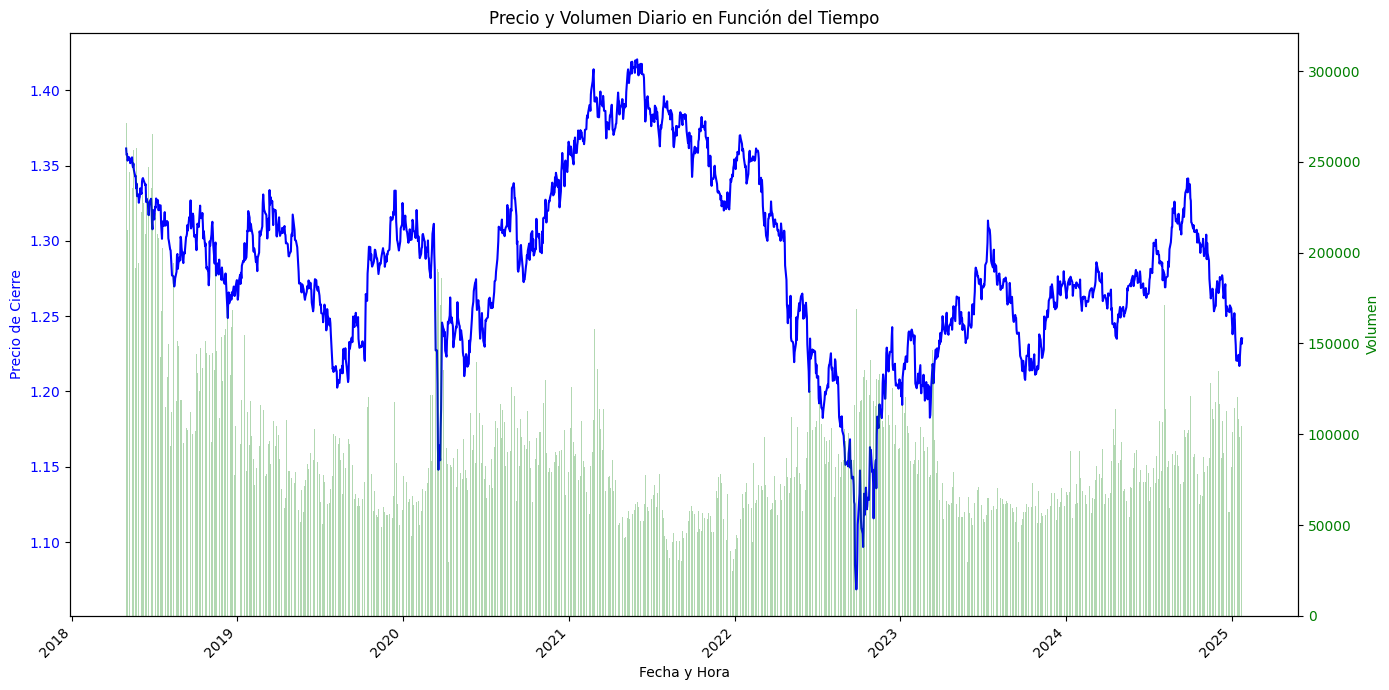

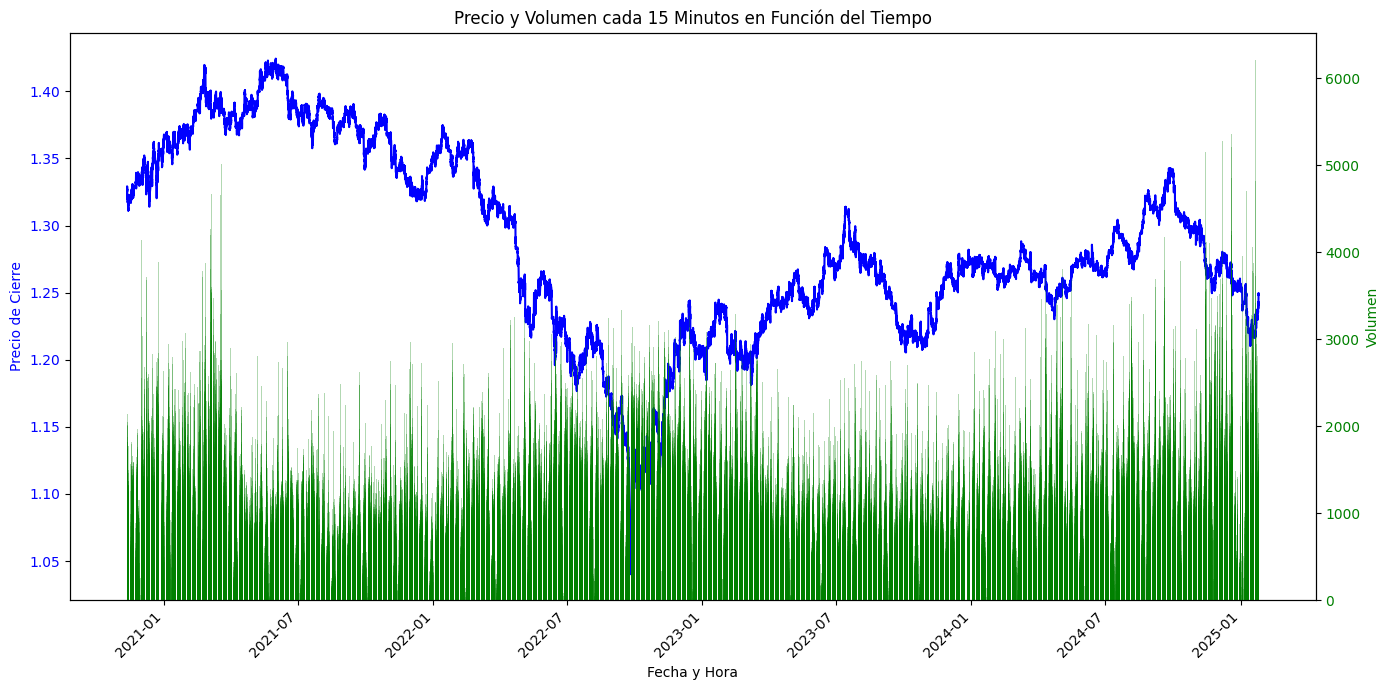

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar archivos CSV en DataFrames de pandas
df_diario = pd.read_csv('fx_data\\GBPUSD_D1', sep=';')
df_15min = pd.read_csv('fx_data\\GBPUSD_15min', sep=';')

# Eliminar columnas 'Unnamed' si existen
df_diario = df_diario.loc[:, ~df_diario.columns.str.contains('^Unnamed')]
df_15min = df_15min.loc[:, ~df_15min.columns.str.contains('^Unnamed')]

# Convertir la columna 'Time' a datetime
df_diario['Time'] = pd.to_datetime(df_diario['Time'])
df_15min['Time'] = pd.to_datetime(df_15min['Time'])

# Eliminar columnas no necesarias
columnas_a_eliminar = ['Open', 'High', 'Low', 'Real_volume', 'Spread', 'timeframe', 'symbol']
df_diario = df_diario.drop(columns=columnas_a_eliminar)
df_15min = df_15min.drop(columns=columnas_a_eliminar)

print("Datos originales - Diario")
print(df_diario.head())
print("\nDatos originales - 15 Minutos")
print(df_15min.head())

# Filtrado de Datos
# Filtrar datos para eliminar anomalías o errores
df_diario = df_diario[(df_diario['Close'] > 0) & (df_diario['Volume'] >= 0)]
df_15min = df_15min[(df_15min['Close'] > 0) & (df_15min['Volume'] >= 0)]

print("\nDatos filtrados - Diario")
print(df_diario.head())
print("\nDatos filtrados - 15 Minutos")
print(df_15min.head())

# Selección, Limpieza y Transformación de Datos

# Eliminación de Duplicados
df_diario = df_diario.drop_duplicates()
df_15min = df_15min.drop_duplicates()

print("\nDatos sin duplicados - Diario")
print(df_diario.head())
print("\nDatos sin duplicados - 15 Minutos")
print(df_15min.head())

# Manejo de Valores Faltantes
# Reemplazar valores faltantes con la media de la columna
df_diario.fillna(df_diario.mean(), inplace=True)
df_15min.fillna(df_15min.mean(), inplace=True)

print("\nDatos sin valores faltantes - Diario")
print(df_diario.head())
print("\nDatos sin valores faltantes - 15 Minutos")
print(df_15min.head())

# Normalización de Datos
scaler = StandardScaler()
df_diario_normalizados = scaler.fit_transform(df_diario[['Close', 'Volume']])
df_15min_normalizados = scaler.fit_transform(df_15min[['Close', 'Volume']])

df_diario_normalizados = pd.DataFrame(df_diario_normalizados, columns=['Close', 'Volume'])
df_15min_normalizados = pd.DataFrame(df_15min_normalizados, columns=['Close', 'Volume'])

print("\nDatos normalizados - Diario")
print(df_diario_normalizados.head())
print("\nDatos normalizados - 15 Minutos")
print(df_15min_normalizados.head())

# Creación de Nuevas Variables
# Cambio porcentual diario
df_diario['cambio_porcentual'] = df_diario['Close'].pct_change() * 100
df_15min['cambio_porcentual'] = df_15min['Close'].pct_change() * 100

# Volumen relativo
df_diario['volumen_relativo'] = df_diario['Volume'] / df_diario['Volume'].rolling(window=20).mean()
df_15min['volumen_relativo'] = df_15min['Volume'] / df_15min['Volume'].rolling(window=20).mean()

print("\nDatos con nuevas variables - Diario")
print(df_diario.head())
print("\nDatos con nuevas variables - 15 Minutos")
print(df_15min.head())

# Minería de Datos

# Análisis Exploratorio de Datos (EDA)
# Estadísticas descriptivas
print("\nEstadísticas descriptivas - Diario")
print(df_diario.drop(columns=['Time']).describe())
print("\nEstadísticas descriptivas - 15 Minutos")
print(df_15min.drop(columns=['Time']).describe())

# Histogramas
df_diario.drop(columns=['Time']).hist(bins=50, figsize=(20, 15))
plt.suptitle('Histogramas - Diario')
plt.show()

df_15min.drop(columns=['Time']).hist(bins=50, figsize=(20, 15))
plt.suptitle('Histogramas - 15 Minutos')
plt.show()

# Crear heatmap con matriz de correlación
def crear_heatmap(df, titulo):
    plt.figure(figsize=(10, 8))
    correlacion = df.drop(columns=['Time']).corr()  # Excluir la columna 'Time'
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(titulo)
    plt.show()

# Heatmap para los datos diarios
crear_heatmap(df_diario, 'Matriz de Correlación - Diario')

# Heatmap para los datos de 15 minutos
crear_heatmap(df_15min, 'Matriz de Correlación - 15 Minutos')

# Graficar el precio en función del tiempo y el volumen en forma de barras verticales
def graficar_precio_volumen(df, titulo):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Graficar el precio de cierre
    ax1.plot(df['Time'], df['Close'], color='b', label='Precio de Cierre')
    ax1.set_xlabel('Fecha y Hora')
    ax1.set_ylabel('Precio de Cierre', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje y para el volumen
    ax2 = ax1.twinx()
    ax2.bar(df['Time'], df['Volume'], alpha=0.3, color='g', label='Volumen')
    ax2.set_ylabel('Volumen', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Rotar las etiquetas del eje x para mejor legibilidad
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Título y leyenda
    plt.title(titulo)
    fig.tight_layout()
    plt.show()

# Graficar para los datos diarios
graficar_precio_volumen(df_diario, 'Precio y Volumen Diario en Función del Tiempo')

# Graficar para los datos de 15 minutos
graficar_precio_volumen(df_15min, 'Precio y Volumen cada 15 Minutos en Función del Tiempo')

In [17]:
# Crear matriz de correlación y mostrarla
correlacion_diario = df_diario.drop(columns=['Time']).corr()
correlacion_15min = df_15min.drop(columns=['Time']).corr()

print("\nMatriz de Correlación - Diario")
print(correlacion_diario)
print("\nMatriz de Correlación - 15 Minutos")
print(correlacion_15min)


Matriz de Correlación - Diario
                      Close    Volume  cambio_porcentual  volumen_relativo
Close              1.000000 -0.128020           0.055577         -0.049014
Volume            -0.128020  1.000000          -0.032208          0.411472
cambio_porcentual  0.055577 -0.032208           1.000000         -0.079280
volumen_relativo  -0.049014  0.411472          -0.079280          1.000000

Matriz de Correlación - 15 Minutos
                      Close    Volume  cambio_porcentual  volumen_relativo
Close              1.000000 -0.227652           0.004973          0.009893
Volume            -0.227652  1.000000          -0.008048          0.519527
cambio_porcentual  0.004973 -0.008048           1.000000         -0.008989
volumen_relativo   0.009893  0.519527          -0.008989          1.000000


Datos originales - Diario
        Time    Close  Volume
0 2018-05-01  1.36140  203529
1 2018-05-02  1.35707  271314
2 2018-05-03  1.35755  264578
3 2018-05-04  1.35333  212521
4 2018-05-07  1.35571  190496

Datos originales - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos filtrados - Diario
        Time    Close  Volume
0 2018-05-01  1.36140  203529
1 2018-05-02  1.35707  271314
2 2018-05-03  1.35755  264578
3 2018-05-04  1.35333  212521
4 2018-05-07  1.35571  190496

Datos filtrados - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos sin duplicados - Diario
        Time    Close  Volum

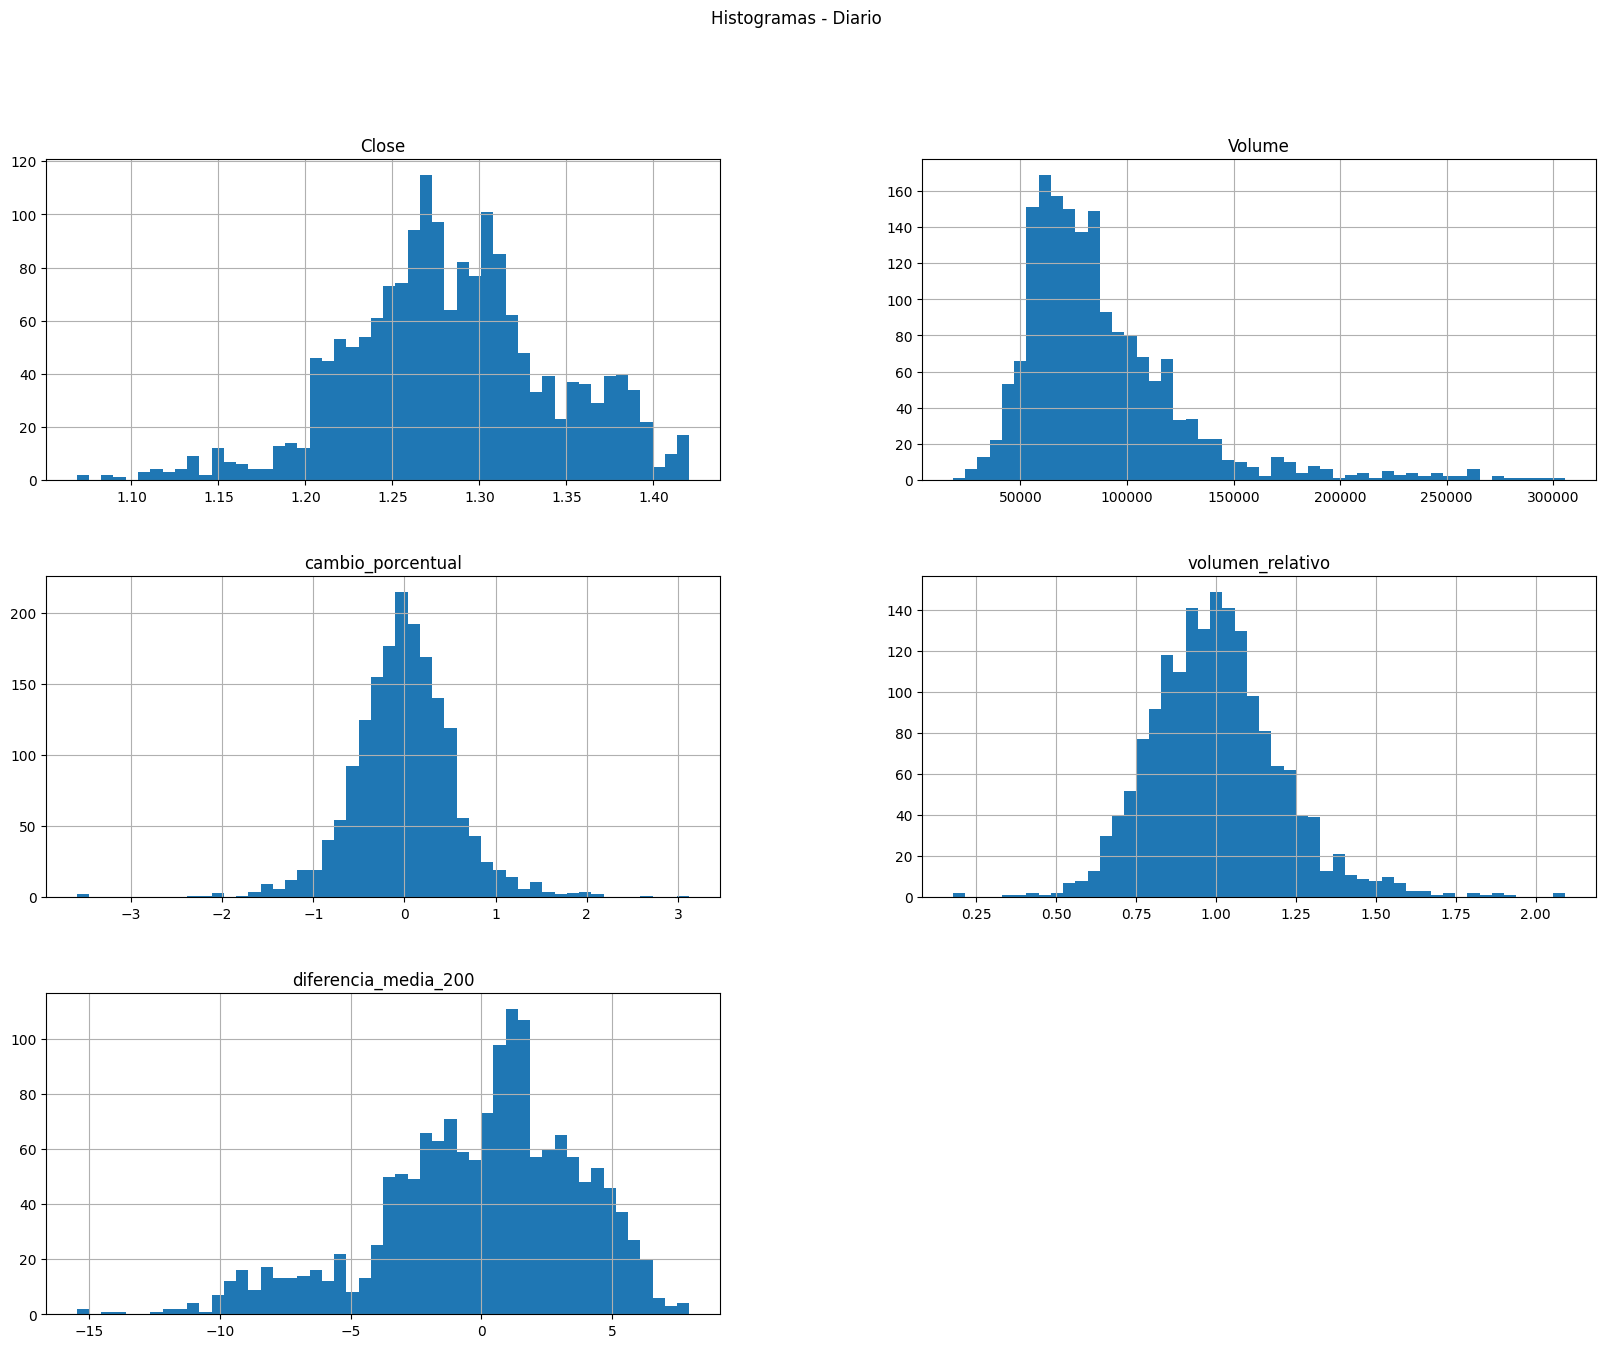

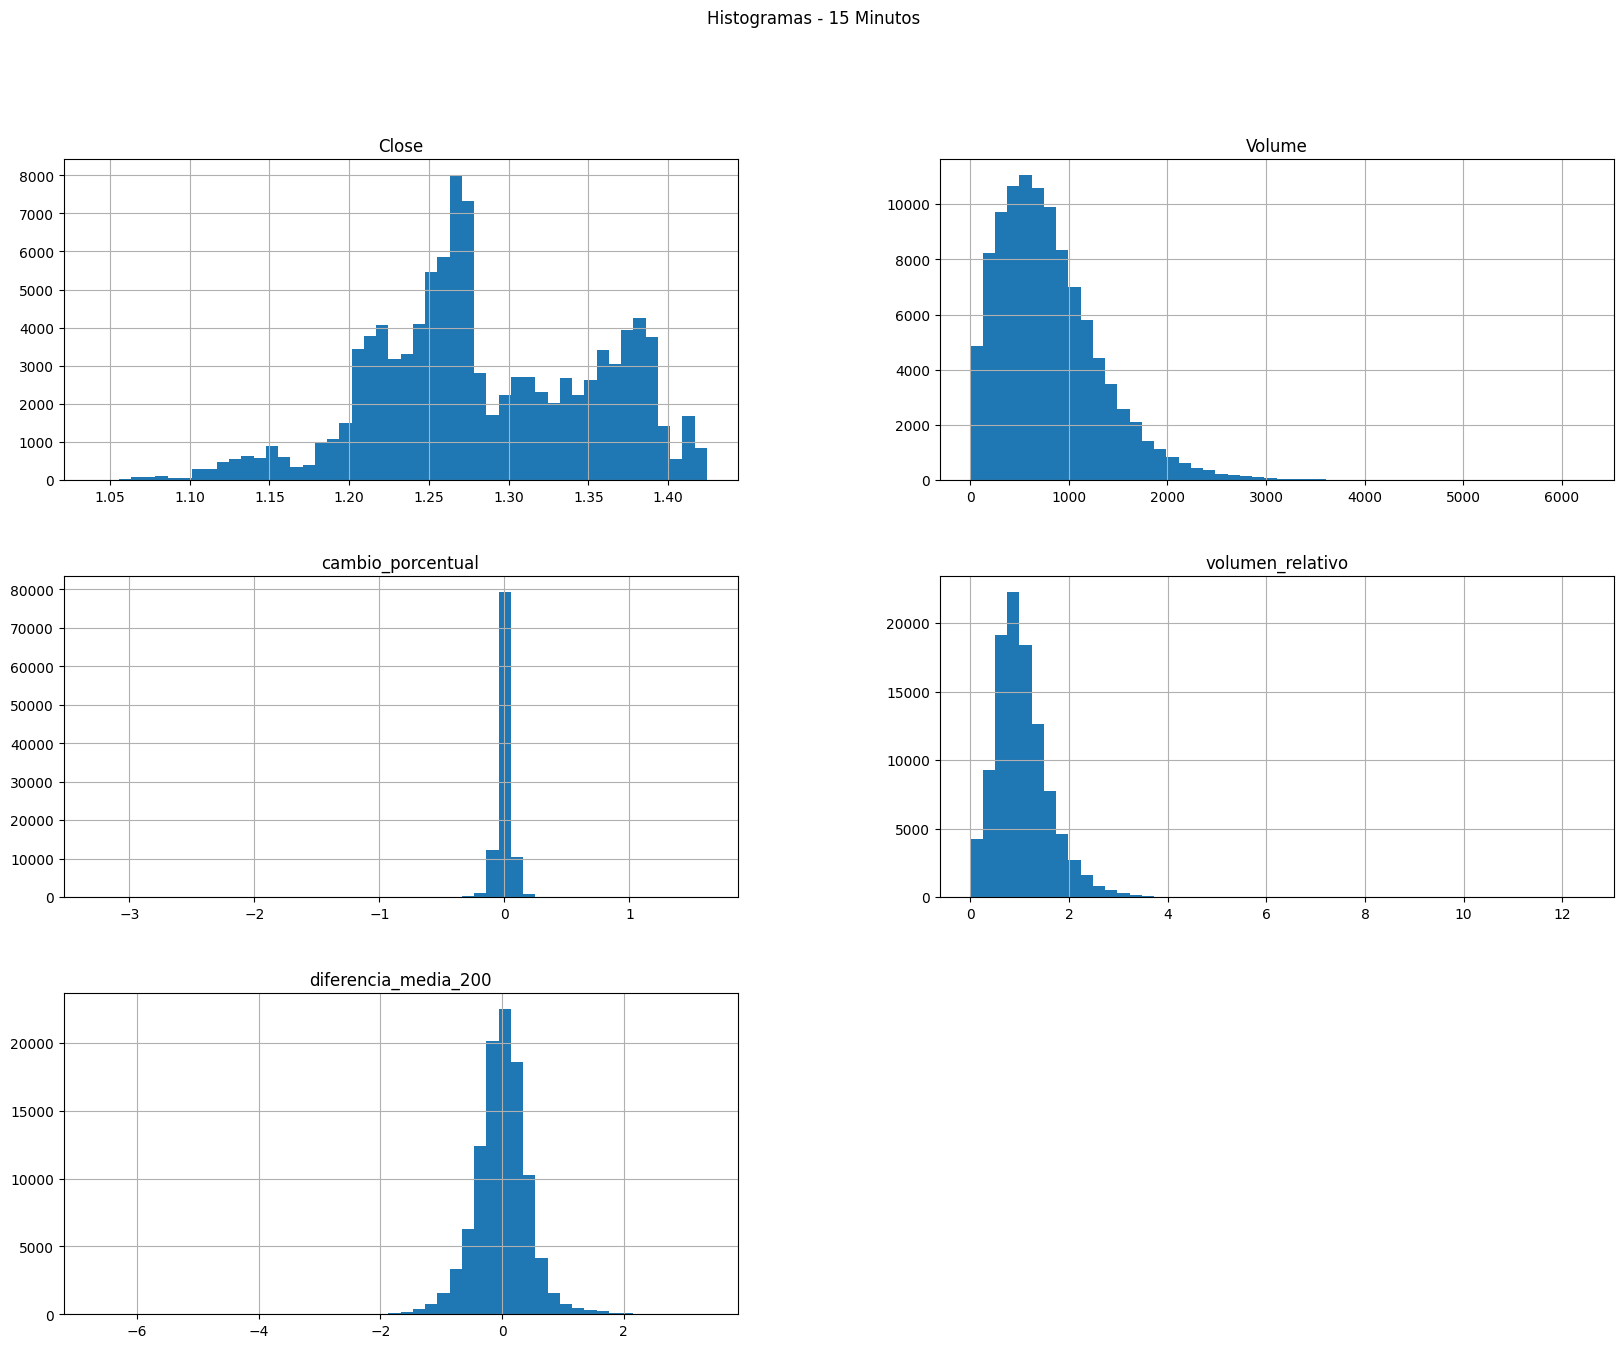


Matriz de Correlación - Diario
                         Close    Volume  cambio_porcentual  volumen_relativo  \
Close                 1.000000 -0.128020           0.055577         -0.049014   
Volume               -0.128020  1.000000          -0.032208          0.411472   
cambio_porcentual     0.055577 -0.032208           1.000000         -0.079280   
volumen_relativo     -0.049014  0.411472          -0.079280          1.000000   
diferencia_media_200  0.610422 -0.246614           0.120906         -0.091866   

                      diferencia_media_200  
Close                             0.610422  
Volume                           -0.246614  
cambio_porcentual                 0.120906  
volumen_relativo                 -0.091866  
diferencia_media_200              1.000000  

Matriz de Correlación - 15 Minutos
                         Close    Volume  cambio_porcentual  volumen_relativo  \
Close                 1.000000 -0.227652           0.004973          0.009893   
Volume       

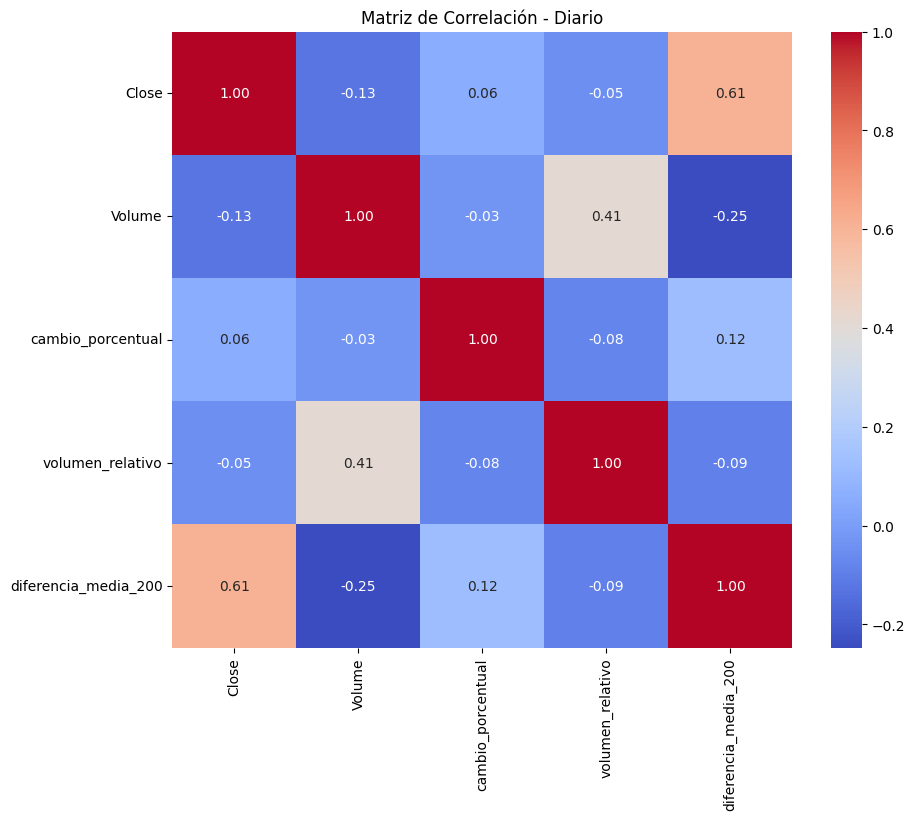

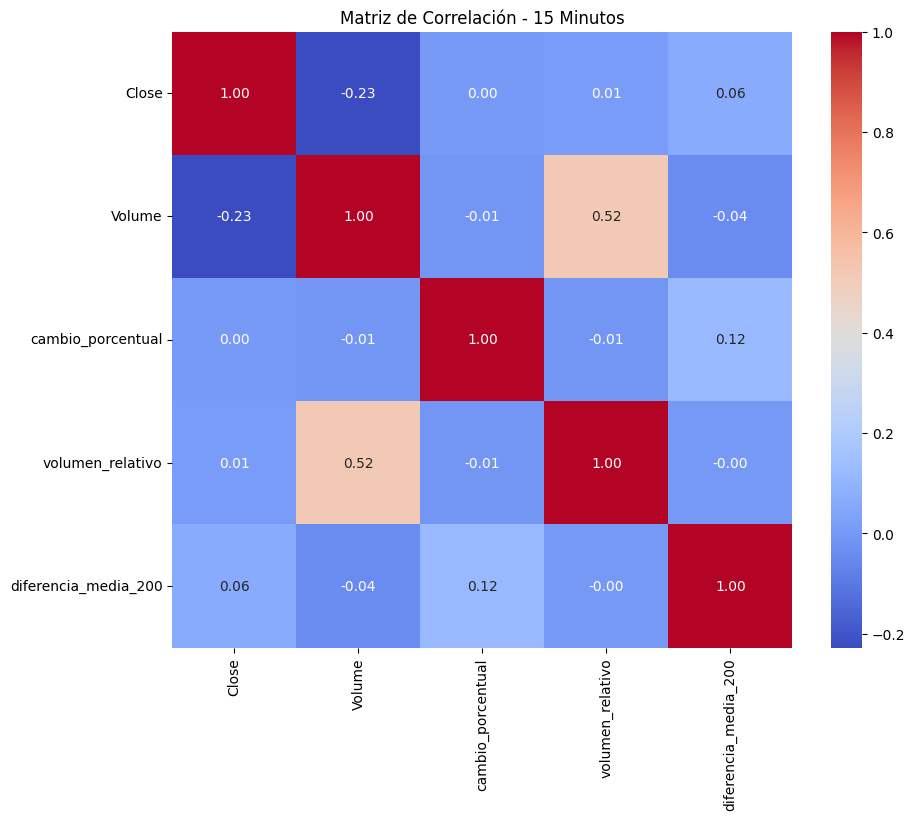

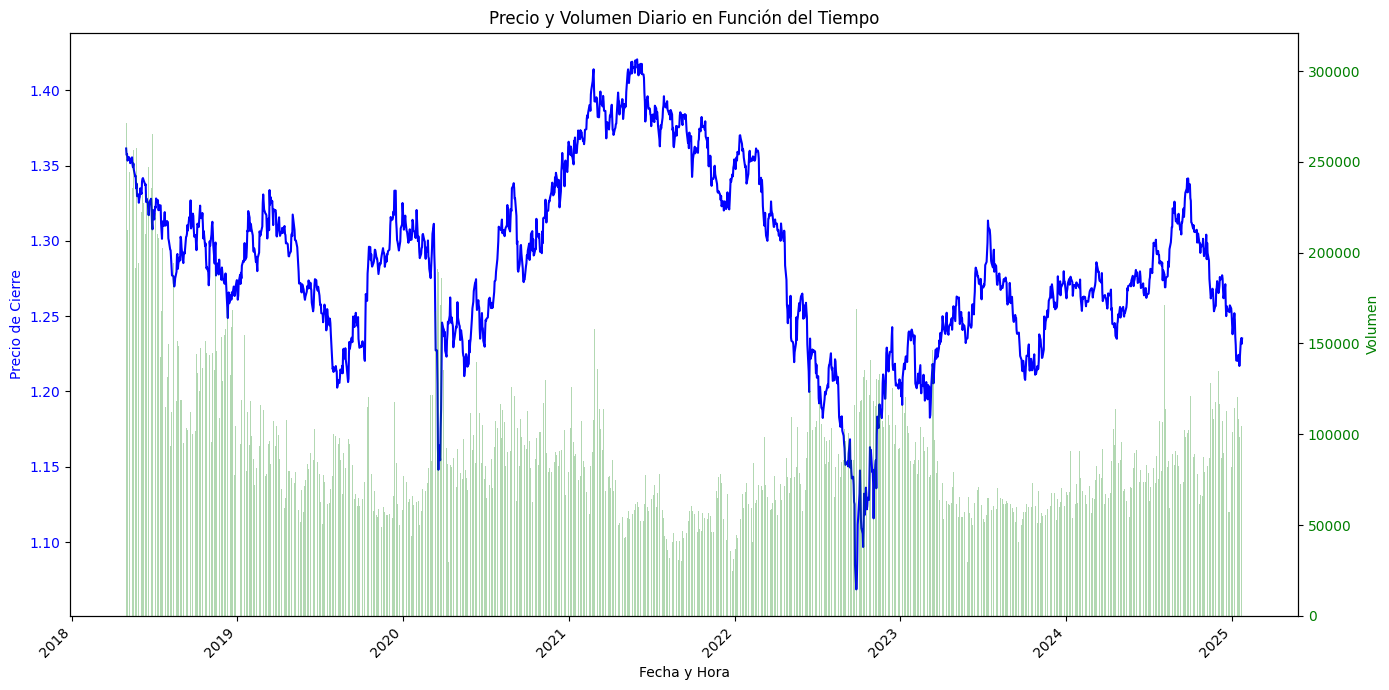

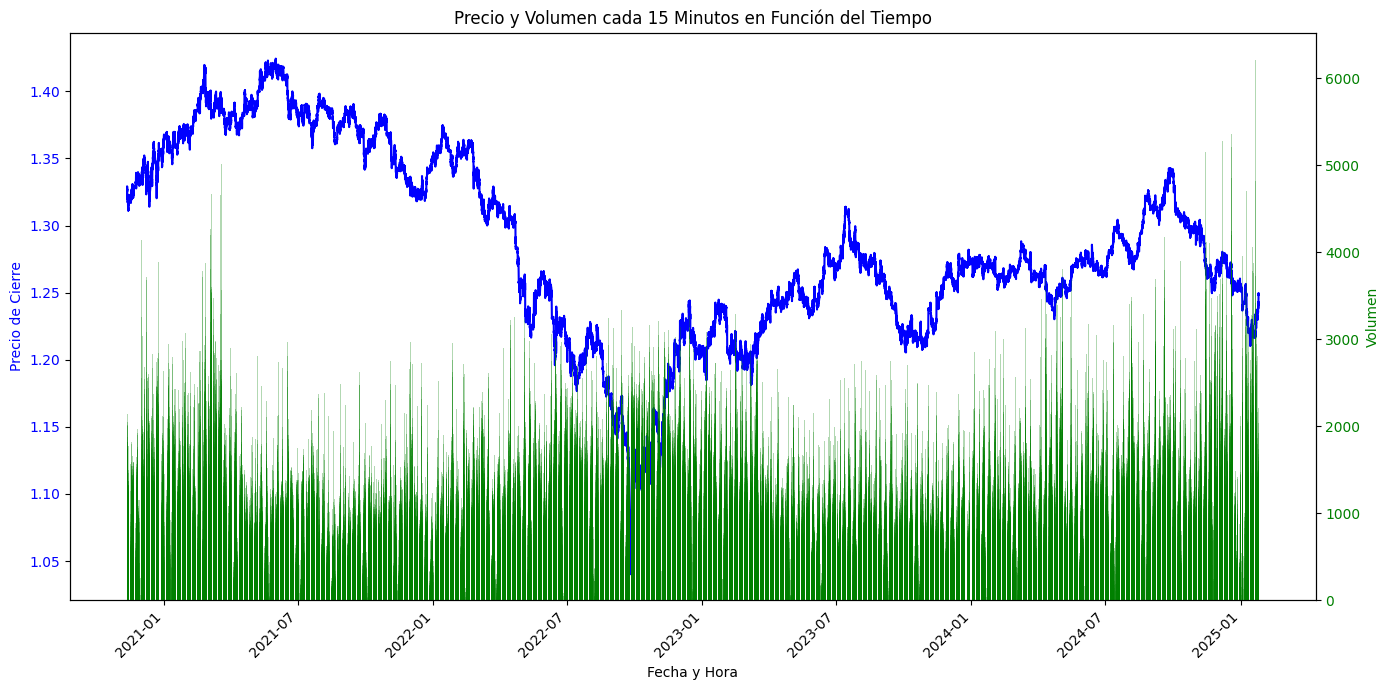

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar archivos CSV en DataFrames de pandas
df_diario = pd.read_csv('fx_data\\GBPUSD_D1', sep=';')
df_15min = pd.read_csv('fx_data\\GBPUSD_15min', sep=';')

# Eliminar columnas 'Unnamed' si existen
df_diario = df_diario.loc[:, ~df_diario.columns.str.contains('^Unnamed')]
df_15min = df_15min.loc[:, ~df_15min.columns.str.contains('^Unnamed')]

# Convertir la columna 'Time' a datetime
df_diario['Time'] = pd.to_datetime(df_diario['Time'])
df_15min['Time'] = pd.to_datetime(df_15min['Time'])

# Eliminar columnas no necesarias
columnas_a_eliminar = ['Open', 'High', 'Low', 'Real_volume', 'Spread', 'timeframe', 'symbol']
df_diario = df_diario.drop(columns=columnas_a_eliminar)
df_15min = df_15min.drop(columns=columnas_a_eliminar)

print("Datos originales - Diario")
print(df_diario.head())
print("\nDatos originales - 15 Minutos")
print(df_15min.head())

# Filtrado de Datos
# Filtrar datos para eliminar anomalías o errores
df_diario = df_diario[(df_diario['Close'] > 0) & (df_diario['Volume'] >= 0)]
df_15min = df_15min[(df_15min['Close'] > 0) & (df_15min['Volume'] >= 0)]

print("\nDatos filtrados - Diario")
print(df_diario.head())
print("\nDatos filtrados - 15 Minutos")
print(df_15min.head())

# Selección, Limpieza y Transformación de Datos

# Eliminación de Duplicados
df_diario = df_diario.drop_duplicates()
df_15min = df_15min.drop_duplicates()

print("\nDatos sin duplicados - Diario")
print(df_diario.head())
print("\nDatos sin duplicados - 15 Minutos")
print(df_15min.head())

# Manejo de Valores Faltantes
# Reemplazar valores faltantes con la media de la columna
df_diario.fillna(df_diario.mean(), inplace=True)
df_15min.fillna(df_15min.mean(), inplace=True)

print("\nDatos sin valores faltantes - Diario")
print(df_diario.head())
print("\nDatos sin valores faltantes - 15 Minutos")
print(df_15min.head())

# Normalización de Datos
scaler = StandardScaler()
df_diario_normalizados = scaler.fit_transform(df_diario[['Close', 'Volume']])
df_15min_normalizados = scaler.fit_transform(df_15min[['Close', 'Volume']])

df_diario_normalizados = pd.DataFrame(df_diario_normalizados, columns=['Close', 'Volume'])
df_15min_normalizados = pd.DataFrame(df_15min_normalizados, columns=['Close', 'Volume'])

print("\nDatos normalizados - Diario")
print(df_diario_normalizados.head())
print("\nDatos normalizados - 15 Minutos")
print(df_15min_normalizados.head())

# Creación de Nuevas Variables
# Cambio porcentual diario
df_diario['cambio_porcentual'] = df_diario['Close'].pct_change() * 100
df_15min['cambio_porcentual'] = df_15min['Close'].pct_change() * 100

# Volumen relativo
df_diario['volumen_relativo'] = df_diario['Volume'] / df_diario['Volume'].rolling(window=20).mean()
df_15min['volumen_relativo'] = df_15min['Volume'] / df_15min['Volume'].rolling(window=20).mean()

# Porcentaje de diferencia del precio actual sobre la media histórica de las últimas 200 ruedas
df_diario['diferencia_media_200'] = (df_diario['Close'] - df_diario['Close'].rolling(window=200).mean()) / df_diario['Close'].rolling(window=200).mean() * 100
df_15min['diferencia_media_200'] = (df_15min['Close'] - df_15min['Close'].rolling(window=200).mean()) / df_15min['Close'].rolling(window=200).mean() * 100

print("\nDatos con nuevas variables - Diario")
print(df_diario.head())
print("\nDatos con nuevas variables - 15 Minutos")
print(df_15min.head())

# Minería de Datos

# Análisis Exploratorio de Datos (EDA)
# Estadísticas descriptivas
print("\nEstadísticas descriptivas - Diario")
print(df_diario.drop(columns=['Time']).describe())
print("\nEstadísticas descriptivas - 15 Minutos")
print(df_15min.drop(columns=['Time']).describe())

# Histogramas
df_diario.drop(columns=['Time']).hist(bins=50, figsize=(20, 15))
plt.suptitle('Histogramas - Diario')
plt.show()

df_15min.drop(columns=['Time']).hist(bins=50, figsize=(20, 15))
plt.suptitle('Histogramas - 15 Minutos')
plt.show()

# Crear matriz de correlación y mostrarla
correlacion_diario = df_diario.drop(columns=['Time']).corr()
correlacion_15min = df_15min.drop(columns=['Time']).corr()

print("\nMatriz de Correlación - Diario")
print(correlacion_diario)
print("\nMatriz de Correlación - 15 Minutos")
print(correlacion_15min)

# Crear heatmap con matriz de correlación
def crear_heatmap(df, titulo):
    plt.figure(figsize=(10, 8))
    correlacion = df.drop(columns=['Time']).corr()  # Excluir la columna 'Time'
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(titulo)
    plt.show()

# Heatmap para los datos diarios
crear_heatmap(df_diario, 'Matriz de Correlación - Diario')

# Heatmap para los datos de 15 minutos
crear_heatmap(df_15min, 'Matriz de Correlación - 15 Minutos')

# Graficar el precio en función del tiempo y el volumen en forma de barras verticales
def graficar_precio_volumen(df, titulo):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Graficar el precio de cierre
    ax1.plot(df['Time'], df['Close'], color='b', label='Precio de Cierre')
    ax1.set_xlabel('Fecha y Hora')
    ax1.set_ylabel('Precio de Cierre', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje y para el volumen
    ax2 = ax1.twinx()
    ax2.bar(df['Time'], df['Volume'], alpha=0.3, color='g', label='Volumen')
    ax2.set_ylabel('Volumen', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Rotar las etiquetas del eje x para mejor legibilidad
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Título y leyenda
    plt.title(titulo)
    fig.tight_layout()
    plt.show()

# Graficar para los datos diarios
graficar_precio_volumen(df_diario, 'Precio y Volumen Diario en Función del Tiempo')

# Graficar para los datos de 15 minutos
graficar_precio_volumen(df_15min, 'Precio y Volumen cada 15 Minutos en Función del Tiempo')

Datos originales - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos filtrados - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos sin duplicados - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos sin valores faltantes - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 202

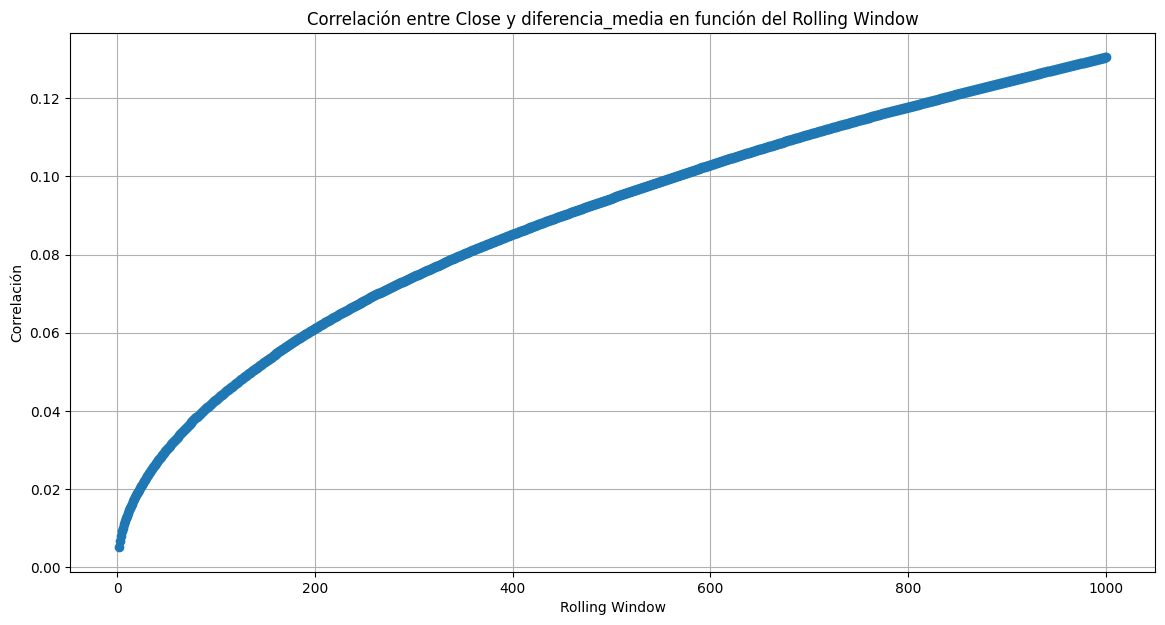

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar archivos CSV en DataFrames de pandas
df_15min = pd.read_csv('fx_data\\GBPUSD_15min', sep=';')

# Eliminar columnas 'Unnamed' si existen
df_15min = df_15min.loc[:, ~df_15min.columns.str.contains('^Unnamed')]

# Convertir la columna 'Time' a datetime
df_15min['Time'] = pd.to_datetime(df_15min['Time'])

# Eliminar columnas no necesarias
columnas_a_eliminar = ['Open', 'High', 'Low', 'Real_volume', 'Spread', 'timeframe', 'symbol']
df_15min = df_15min.drop(columns=columnas_a_eliminar)

print("Datos originales - 15 Minutos")
print(df_15min.head())

# Filtrado de Datos
# Filtrar datos para eliminar anomalías o errores
df_15min = df_15min[(df_15min['Close'] > 0) & (df_15min['Volume'] >= 0)]

print("\nDatos filtrados - 15 Minutos")
print(df_15min.head())

# Selección, Limpieza y Transformación de Datos

# Eliminación de Duplicados
df_15min = df_15min.drop_duplicates()

print("\nDatos sin duplicados - 15 Minutos")
print(df_15min.head())

# Manejo de Valores Faltantes
# Reemplazar valores faltantes con la media de la columna
df_15min.fillna(df_15min.mean(), inplace=True)

print("\nDatos sin valores faltantes - 15 Minutos")
print(df_15min.head())

# Normalización de Datos
scaler = StandardScaler()
df_15min_normalizados = scaler.fit_transform(df_15min[['Close', 'Volume']])

df_15min_normalizados = pd.DataFrame(df_15min_normalizados, columns=['Close', 'Volume'])

print("\nDatos normalizados - 15 Minutos")
print(df_15min_normalizados.head())

# Creación de Nuevas Variables
# Cambio porcentual diario
df_15min['cambio_porcentual'] = df_15min['Close'].pct_change() * 100

# Volumen relativo
df_15min['volumen_relativo'] = df_15min['Volume'] / df_15min['Volume'].rolling(window=20).mean()

print("\nDatos con nuevas variables - 15 Minutos")
print(df_15min.head())

# Función para calcular el porcentaje de diferencia del precio actual sobre la media histórica
def calcular_diferencia_media(df, rolling_window):
    df['diferencia_media'] = (df['Close'] - df['Close'].rolling(window=rolling_window).mean()) / df['Close'].rolling(window=rolling_window).mean() * 100
    return df

# Calcular correlaciones para diferentes valores de rolling window
def calcular_correlaciones(df, max_window):
    correlaciones = []
    for window in range(1, max_window + 1):
        df = calcular_diferencia_media(df, window)
        correlacion = df[['Close', 'diferencia_media']].corr().iloc[0, 1]
        correlaciones.append(correlacion)
    return correlaciones

# Calcular y graficar las correlaciones
def graficar_correlaciones(df, max_window):
    correlaciones = calcular_correlaciones(df, max_window)
    plt.figure(figsize=(14, 7))
    plt.plot(range(1, max_window + 1), correlaciones, marker='o')
    plt.xlabel('Rolling Window')
    plt.ylabel('Correlación')
    plt.title('Correlación entre Close y diferencia_media en función del Rolling Window')
    plt.grid(True)
    plt.show()

# Llamar a la función y graficar las correlaciones
graficar_correlaciones(df_15min, 1000)

Datos originales - Diario
        Time    Close  Volume
0 2018-05-01  1.36140  203529
1 2018-05-02  1.35707  271314
2 2018-05-03  1.35755  264578
3 2018-05-04  1.35333  212521
4 2018-05-07  1.35571  190496

Datos originales - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos filtrados - Diario
        Time    Close  Volume
0 2018-05-01  1.36140  203529
1 2018-05-02  1.35707  271314
2 2018-05-03  1.35755  264578
3 2018-05-04  1.35333  212521
4 2018-05-07  1.35571  190496

Datos filtrados - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos sin duplicados - Diario
        Time    Close  Volum

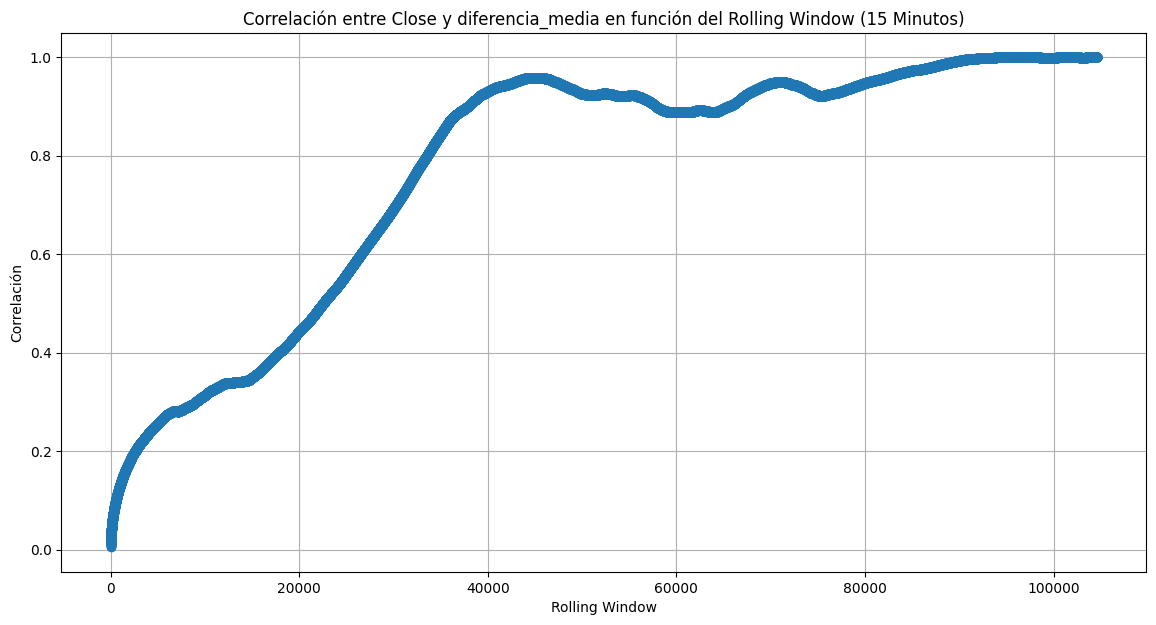

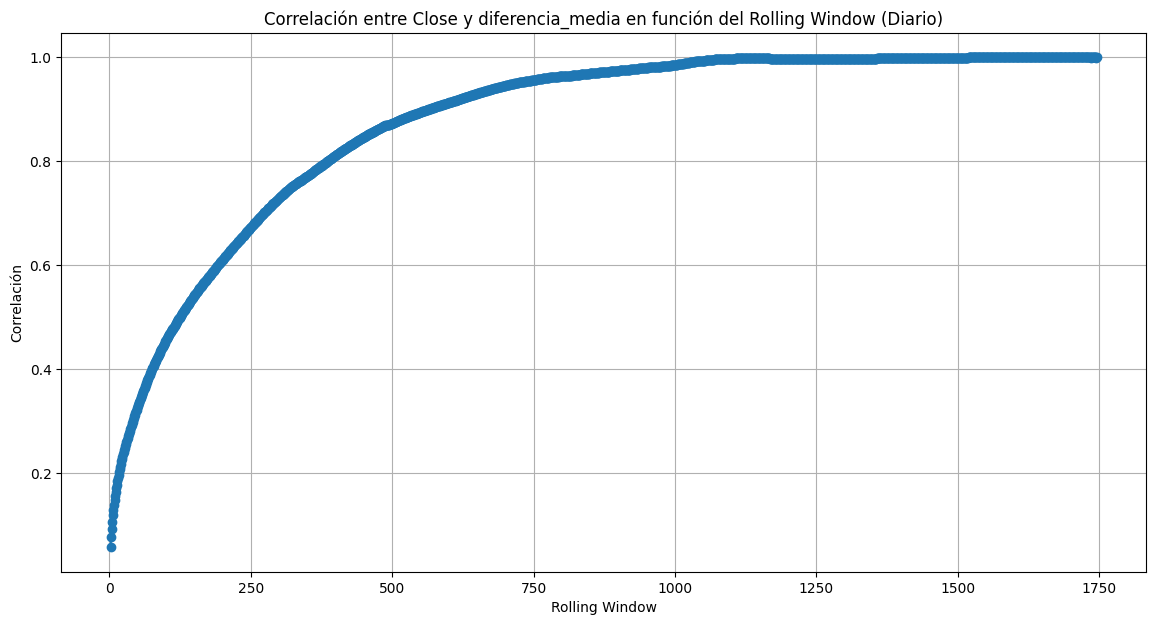

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar archivos CSV en DataFrames de pandas
df_diario = pd.read_csv('fx_data\\GBPUSD_D1', sep=';')
df_15min = pd.read_csv('fx_data\\GBPUSD_15min', sep=';')

# Eliminar columnas 'Unnamed' si existen
df_diario = df_diario.loc[:, ~df_diario.columns.str.contains('^Unnamed')]
df_15min = df_15min.loc[:, ~df_15min.columns.str.contains('^Unnamed')]

# Convertir la columna 'Time' a datetime
df_diario['Time'] = pd.to_datetime(df_diario['Time'])
df_15min['Time'] = pd.to_datetime(df_15min['Time'])

# Eliminar columnas no necesarias
columnas_a_eliminar = ['Open', 'High', 'Low', 'Real_volume', 'Spread', 'timeframe', 'symbol']
df_diario = df_diario.drop(columns=columnas_a_eliminar)
df_15min = df_15min.drop(columns=columnas_a_eliminar)

print("Datos originales - Diario")
print(df_diario.head())
print("\nDatos originales - 15 Minutos")
print(df_15min.head())

# Filtrado de Datos
# Filtrar datos para eliminar anomalías o errores
df_diario = df_diario[(df_diario['Close'] > 0) & (df_diario['Volume'] >= 0)]
df_15min = df_15min[(df_15min['Close'] > 0) & (df_15min['Volume'] >= 0)]

print("\nDatos filtrados - Diario")
print(df_diario.head())
print("\nDatos filtrados - 15 Minutos")
print(df_15min.head())

# Selección, Limpieza y Transformación de Datos

# Eliminación de Duplicados
df_diario = df_diario.drop_duplicates()
df_15min = df_15min.drop_duplicates()

print("\nDatos sin duplicados - Diario")
print(df_diario.head())
print("\nDatos sin duplicados - 15 Minutos")
print(df_15min.head())

# Manejo de Valores Faltantes
# Reemplazar valores faltantes con la media de la columna
df_diario.fillna(df_diario.mean(), inplace=True)
df_15min.fillna(df_15min.mean(), inplace=True)

print("\nDatos sin valores faltantes - Diario")
print(df_diario.head())
print("\nDatos sin valores faltantes - 15 Minutos")
print(df_15min.head())

# Normalización de Datos
scaler = StandardScaler()
df_diario_normalizados = scaler.fit_transform(df_diario[['Close', 'Volume']])
df_15min_normalizados = scaler.fit_transform(df_15min[['Close', 'Volume']])

df_diario_normalizados = pd.DataFrame(df_diario_normalizados, columns=['Close', 'Volume'])
df_15min_normalizados = pd.DataFrame(df_15min_normalizados, columns=['Close', 'Volume'])

print("\nDatos normalizados - Diario")
print(df_diario_normalizados.head())
print("\nDatos normalizados - 15 Minutos")
print(df_15min_normalizados.head())

# Creación de Nuevas Variables
# Cambio porcentual diario
df_diario['cambio_porcentual'] = df_diario['Close'].pct_change() * 100
df_15min['cambio_porcentual'] = df_15min['Close'].pct_change() * 100

# Volumen relativo
df_diario['volumen_relativo'] = df_diario['Volume'] / df_diario['Volume'].rolling(window=20).mean()
df_15min['volumen_relativo'] = df_15min['Volume'] / df_15min['Volume'].rolling(window=20).mean()

print("\nDatos con nuevas variables - Diario")
print(df_diario.head())
print("\nDatos con nuevas variables - 15 Minutos")
print(df_15min.head())

# Función para calcular el porcentaje de diferencia del precio actual sobre la media histórica
def calcular_diferencia_media(df, rolling_window):
    df['diferencia_media'] = (df['Close'] - df['Close'].rolling(window=rolling_window).mean()) / df['Close'].rolling(window=rolling_window).mean() * 100
    return df

# Calcular correlaciones para diferentes valores de rolling window
def calcular_correlaciones(df, max_window):
    correlaciones = []
    for window in range(1, max_window + 1):
        df = calcular_diferencia_media(df, window)
        correlacion = df[['Close', 'diferencia_media']].corr().iloc[0, 1]
        correlaciones.append(correlacion)
    return correlaciones

# Calcular y graficar las correlaciones
def graficar_correlaciones(df, max_window, titulo):
    correlaciones = calcular_correlaciones(df, max_window)
    plt.figure(figsize=(14, 7))
    plt.plot(range(1, max_window + 1), correlaciones, marker='o')
    plt.xlabel('Rolling Window')
    plt.ylabel('Correlación')
    plt.title(titulo)
    plt.grid(True)
    plt.show()

# Llamar a la función y graficar las correlaciones para los datos de 15 minutos
graficar_correlaciones(df_15min, len(df_15min), 'Correlación entre Close y diferencia_media en función del Rolling Window (15 Minutos)')

# Llamar a la función y graficar las correlaciones para los datos diarios
graficar_correlaciones(df_diario, len(df_diario), 'Correlación entre Close y diferencia_media en función del Rolling Window (Diario)')

Datos originales - Diario
        Time    Close  Volume
0 2018-05-01  1.36140  203529
1 2018-05-02  1.35707  271314
2 2018-05-03  1.35755  264578
3 2018-05-04  1.35333  212521
4 2018-05-07  1.35571  190496

Datos originales - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos filtrados - Diario
        Time    Close  Volume
0 2018-05-01  1.36140  203529
1 2018-05-02  1.35707  271314
2 2018-05-03  1.35755  264578
3 2018-05-04  1.35333  212521
4 2018-05-07  1.35571  190496

Datos filtrados - 15 Minutos
                 Time    Close  Volume
0 2020-11-11 09:00:00  1.32844    1065
1 2020-11-11 09:15:00  1.32803     823
2 2020-11-11 09:30:00  1.32760    1093
3 2020-11-11 09:45:00  1.32766    1224
4 2020-11-11 10:00:00  1.32921    1796

Datos sin duplicados - Diario
        Time    Close  Volum

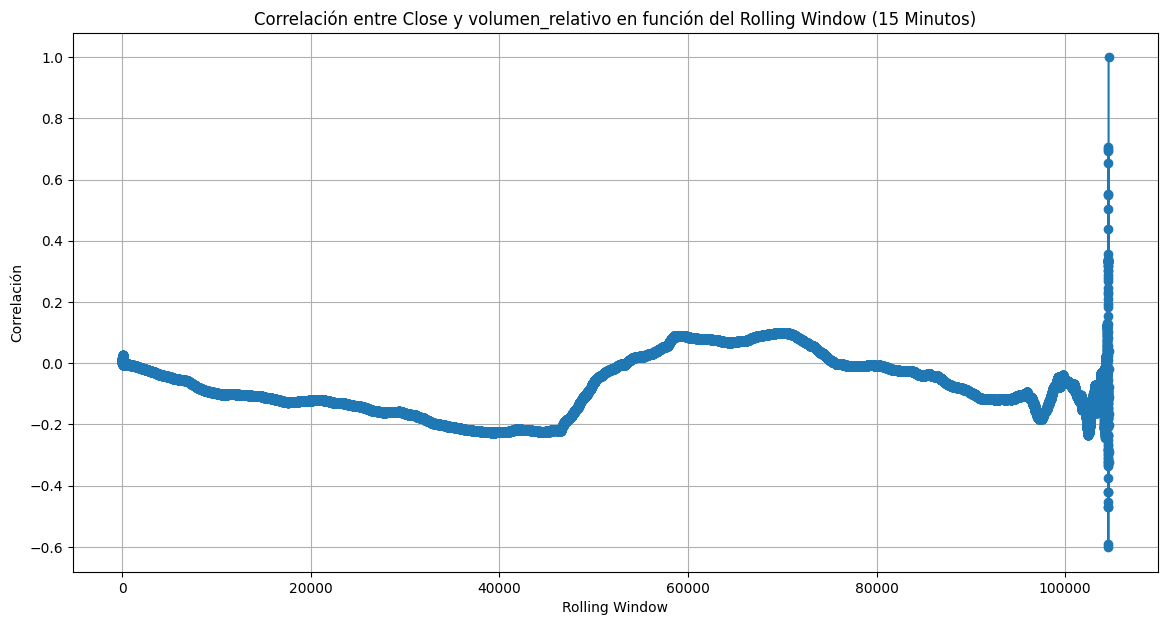

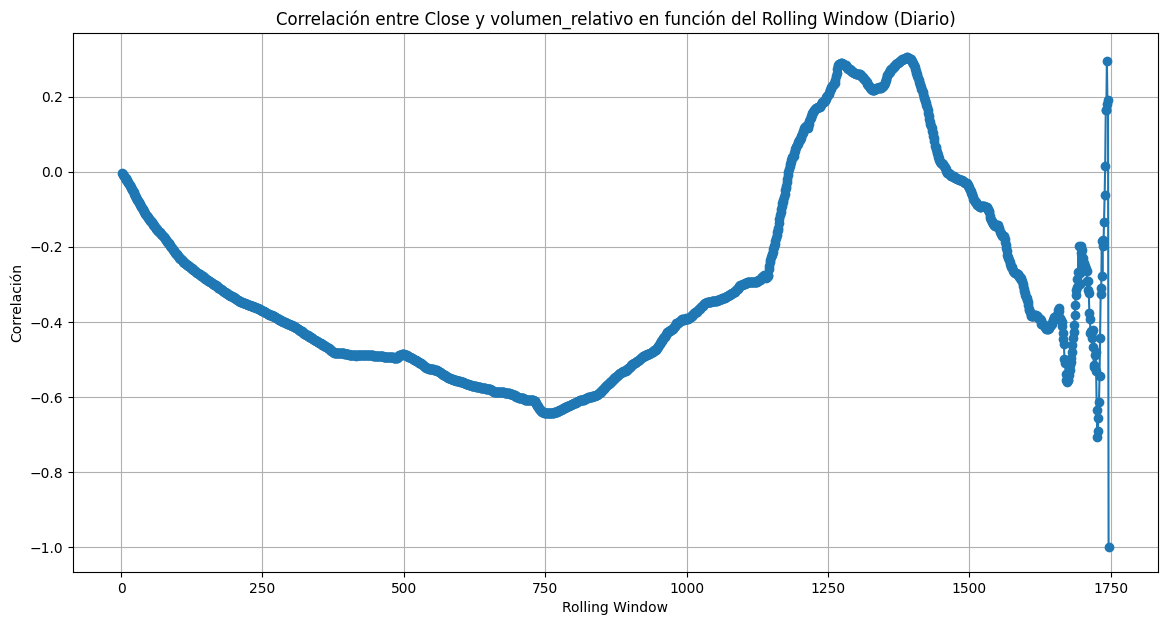

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar archivos CSV en DataFrames de pandas
df_diario = pd.read_csv('fx_data\\GBPUSD_D1', sep=';')
df_15min = pd.read_csv('fx_data\\GBPUSD_15min', sep=';')

# Eliminar columnas 'Unnamed' si existen
df_diario = df_diario.loc[:, ~df_diario.columns.str.contains('^Unnamed')]
df_15min = df_15min.loc[:, ~df_15min.columns.str.contains('^Unnamed')]

# Convertir la columna 'Time' a datetime
df_diario['Time'] = pd.to_datetime(df_diario['Time'])
df_15min['Time'] = pd.to_datetime(df_15min['Time'])

# Eliminar columnas no necesarias
columnas_a_eliminar = ['Open', 'High', 'Low', 'Real_volume', 'Spread', 'timeframe', 'symbol']
df_diario = df_diario.drop(columns=columnas_a_eliminar)
df_15min = df_15min.drop(columns=columnas_a_eliminar)

print("Datos originales - Diario")
print(df_diario.head())
print("\nDatos originales - 15 Minutos")
print(df_15min.head())

# Filtrado de Datos
# Filtrar datos para eliminar anomalías o errores
df_diario = df_diario[(df_diario['Close'] > 0) & (df_diario['Volume'] >= 0)]
df_15min = df_15min[(df_15min['Close'] > 0) & (df_15min['Volume'] >= 0)]

print("\nDatos filtrados - Diario")
print(df_diario.head())
print("\nDatos filtrados - 15 Minutos")
print(df_15min.head())

# Selección, Limpieza y Transformación de Datos

# Eliminación de Duplicados
df_diario = df_diario.drop_duplicates()
df_15min = df_15min.drop_duplicates()

print("\nDatos sin duplicados - Diario")
print(df_diario.head())
print("\nDatos sin duplicados - 15 Minutos")
print(df_15min.head())

# Manejo de Valores Faltantes
# Reemplazar valores faltantes con la media de la columna
df_diario.fillna(df_diario.mean(), inplace=True)
df_15min.fillna(df_15min.mean(), inplace=True)

print("\nDatos sin valores faltantes - Diario")
print(df_diario.head())
print("\nDatos sin valores faltantes - 15 Minutos")
print(df_15min.head())

# Normalización de Datos
scaler = StandardScaler()
df_diario_normalizados = scaler.fit_transform(df_diario[['Close', 'Volume']])
df_15min_normalizados = scaler.fit_transform(df_15min[['Close', 'Volume']])

df_diario_normalizados = pd.DataFrame(df_diario_normalizados, columns=['Close', 'Volume'])
df_15min_normalizados = pd.DataFrame(df_15min_normalizados, columns=['Close', 'Volume'])

print("\nDatos normalizados - Diario")
print(df_diario_normalizados.head())
print("\nDatos normalizados - 15 Minutos")
print(df_15min_normalizados.head())

# Creación de Nuevas Variables
# Cambio porcentual diario
df_diario['cambio_porcentual'] = df_diario['Close'].pct_change() * 100
df_15min['cambio_porcentual'] = df_15min['Close'].pct_change() * 100

print("\nDatos con nuevas variables - Diario")
print(df_diario.head())
print("\nDatos con nuevas variables - 15 Minutos")
print(df_15min.head())

# Función para calcular el volumen relativo
def calcular_volumen_relativo(df, rolling_window):
    df['volumen_relativo'] = df['Volume'] / df['Volume'].rolling(window=rolling_window).mean()
    return df

# Calcular correlaciones para diferentes valores de rolling window
def calcular_correlaciones_volumen(df, max_window):
    correlaciones = []
    for window in range(1, max_window + 1):
        df = calcular_volumen_relativo(df, window)
        correlacion = df[['Close', 'volumen_relativo']].corr().iloc[0, 1]
        correlaciones.append(correlacion)
    return correlaciones

# Calcular y graficar las correlaciones
def graficar_correlaciones_volumen(df, max_window, titulo):
    correlaciones = calcular_correlaciones_volumen(df, max_window)
    plt.figure(figsize=(14, 7))
    plt.plot(range(1, max_window + 1), correlaciones, marker='o')
    plt.xlabel('Rolling Window')
    plt.ylabel('Correlación')
    plt.title(titulo)
    plt.grid(True)
    plt.show()

# Llamar a la función y graficar las correlaciones para los datos de 15 minutos
graficar_correlaciones_volumen(df_15min, len(df_15min), 'Correlación entre Close y volumen_relativo en función del Rolling Window (15 Minutos)')

# Llamar a la función y graficar las correlaciones para los datos diarios
graficar_correlaciones_volumen(df_diario, len(df_diario), 'Correlación entre Close y volumen_relativo en función del Rolling Window (Diario)')

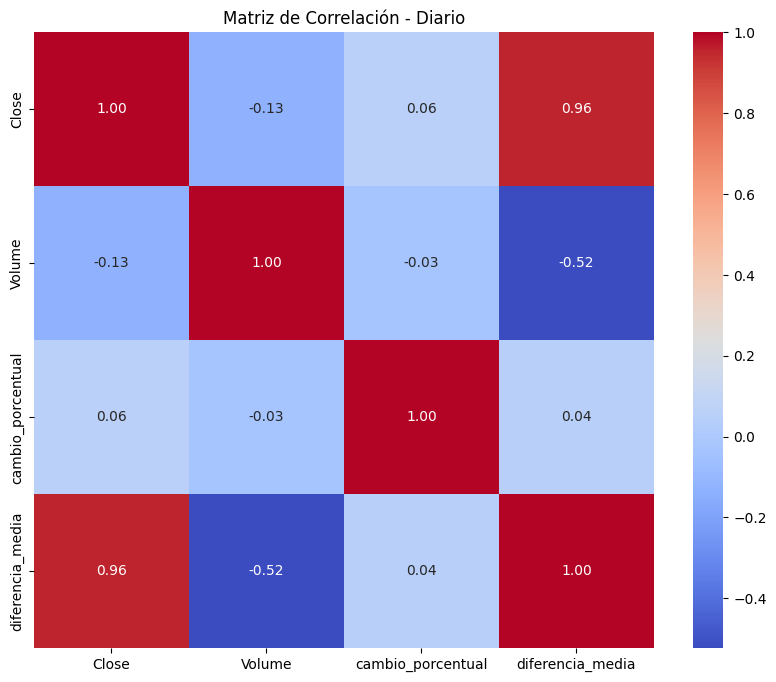

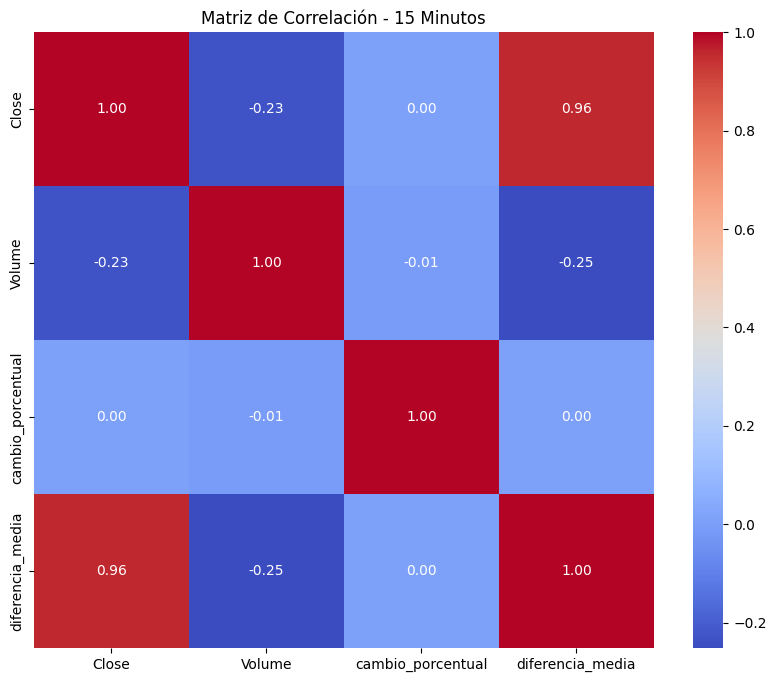

In [22]:
df_15min = calcular_diferencia_media(df_15min, 45000)
df_diario = calcular_diferencia_media(df_diario, 750)

# Crear heatmap con matriz de correlación
def crear_heatmap(df, titulo):
    plt.figure(figsize=(10, 8))
    correlacion = df.drop(columns=['Time', 'volumen_relativo']).corr()  # Excluir la columna 'Time' y 'volumen_relativo'
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(titulo)
    plt.show()

# Heatmap para los datos diarios
crear_heatmap(df_diario, 'Matriz de Correlación - Diario')

# Heatmap para los datos de 15 minutos
crear_heatmap(df_15min, 'Matriz de Correlación - 15 Minutos')

In [23]:
# Calcular la diferencia de precio a la media de 750 para el dataset diario
df_diario = calcular_diferencia_media(df_diario, 750)

# Calcular la diferencia de precio a la media de 45000 para el dataset de 15 minutos
df_15min = calcular_diferencia_media(df_15min, 45000)

# Imprimir los 5 primeros registros de los datasets resultantes
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min.head())


Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  volumen_relativo  \
0 2018-05-01  1.36140  203529                NaN               NaN   
1 2018-05-02  1.35707  271314          -0.318055               NaN   
2 2018-05-03  1.35755  264578           0.035370               NaN   
3 2018-05-04  1.35333  212521          -0.310854               NaN   
4 2018-05-07  1.35571  190496           0.175863               NaN   

   diferencia_media  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

Datos finales - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  volumen_relativo  \
0 2020-11-11 09:00:00  1.32844    1065                NaN               NaN   
1 2020-11-11 09:15:00  1.32803     823          -0.030863               NaN   
2 2020-11-11 09:30:00  1.32760    1093          -0.032379               Na

In [24]:
# Calcular la diferencia de precio a la media de 750 para el dataset diario
df_diario = calcular_diferencia_media(df_diario, 750)

# Calcular la diferencia de precio a la media de 45000 para el dataset de 15 minutos
df_15min = calcular_diferencia_media(df_15min, 45000)

# Imprimir los 5 primeros registros de los datasets resultantes
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min.head())


Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  volumen_relativo  \
0 2018-05-01  1.36140  203529                NaN               NaN   
1 2018-05-02  1.35707  271314          -0.318055               NaN   
2 2018-05-03  1.35755  264578           0.035370               NaN   
3 2018-05-04  1.35333  212521          -0.310854               NaN   
4 2018-05-07  1.35571  190496           0.175863               NaN   

   diferencia_media  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

Datos finales - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  volumen_relativo  \
0 2020-11-11 09:00:00  1.32844    1065                NaN               NaN   
1 2020-11-11 09:15:00  1.32803     823          -0.030863               NaN   
2 2020-11-11 09:30:00  1.32760    1093          -0.032379               Na

In [25]:
# Calcular la diferencia de precio a la media de 750 para el dataset diario
df_diario = calcular_diferencia_media(df_diario, 750)

# Calcular la diferencia de precio a la media de 45000 para el dataset de 15 minutos
df_15min = calcular_diferencia_media(df_15min, 45000)

# Quitar la columna de volumen relativo
if 'volumen_relativo' in df_diario.columns:
    df_diario.drop(columns=['volumen_relativo'], inplace=True)
if 'volumen_relativo' in df_15min.columns:
    df_15min.drop(columns=['volumen_relativo'], inplace=True)

# Reemplazar NaN con 0 en todo el DataFrame
df_diario.fillna(0, inplace=True)
df_15min.fillna(0, inplace=True)

# Imprimir los 5 primeros registros de los datasets resultantes
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min.head())


Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2018-05-01  1.36140  203529           0.000000               0.0
1 2018-05-02  1.35707  271314          -0.318055               0.0
2 2018-05-03  1.35755  264578           0.035370               0.0
3 2018-05-04  1.35333  212521          -0.310854               0.0
4 2018-05-07  1.35571  190496           0.175863               0.0

Datos finales - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2020-11-11 09:00:00  1.32844    1065           0.000000               0.0
1 2020-11-11 09:15:00  1.32803     823          -0.030863               0.0
2 2020-11-11 09:30:00  1.32760    1093          -0.032379               0.0
3 2020-11-11 09:45:00  1.32766    1224           0.004519               0.0
4 2020-11-11 10:00:00  1.32921    1796           0.116747               0.0


In [26]:
# Calcular la diferencia de precio a la media de 750 para el dataset diario
df_diario = calcular_diferencia_media(df_diario, 750)

# Calcular la diferencia de precio a la media de 45000 para el dataset de 15 minutos
df_15min = calcular_diferencia_media(df_15min, 45000)

# Quitar la columna de volumen relativo
if 'volumen_relativo' in df_diario.columns:
    df_diario.drop(columns=['volumen_relativo'], inplace=True)
if 'volumen_relativo' in df_15min.columns:
    df_15min.drop(columns=['volumen_relativo'], inplace=True)

# Reemplazar NaN con 0 en todo el DataFrame
df_diario.fillna(0, inplace=True)
df_15min.fillna(0, inplace=True)

# Crear nuevos datasets a partir del primer dato que sea diferente de 0 en el campo diferencia_media
df_diario_nuevo = df_diario[df_diario['diferencia_media'] != 0].reset_index(drop=True)
df_15min_nuevo = df_15min[df_15min['diferencia_media'] != 0].reset_index(drop=True)

# Imprimir los 5 primeros registros de los nuevos datasets resultantes
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario_nuevo.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_nuevo.head())


Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2021-03-23  1.37532   86571          -0.797761          6.323102
1 2021-03-24  1.36814   79658          -0.522060          5.767296
2 2021-03-25  1.37322   84132           0.371307          6.158251
3 2021-03-26  1.37894   67955           0.416539          6.598091
4 2021-03-29  1.37611   76512          -0.205230          6.376822

Datos finales - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2022-09-02 00:00:00  1.15414      41          -0.023389        -13.526764
1 2022-09-02 00:15:00  1.15388     664          -0.022528        -13.545993
2 2022-09-02 00:30:00  1.15384     370          -0.003467        -13.548739
3 2022-09-02 00:45:00  1.15396     453           0.010400        -13.539498
4 2022-09-02 01:00:00  1.15396     380           0.000000        -13.539248


In [27]:
# Calcular la diferencia de precio a la media de 750 para el dataset diario
df_diario = calcular_diferencia_media(df_diario, 750)

# Calcular la diferencia de precio a la media de 45000 para el dataset de 15 minutos
df_15min = calcular_diferencia_media(df_15min, 45000)

# Quitar la columna de volumen relativo
if 'volumen_relativo' in df_diario.columns:
    df_diario.drop(columns=['volumen_relativo'], inplace=True)
if 'volumen_relativo' in df_15min.columns:
    df_15min.drop(columns=['volumen_relativo'], inplace=True)

# Reemplazar NaN con 0 en todo el DataFrame
df_diario.fillna(0, inplace=True)
df_15min.fillna(0, inplace=True)

# Crear nuevos datasets a partir del primer dato que sea diferente de 0 en el campo diferencia_media
df_diario_nuevo = df_diario[df_diario['diferencia_media'] != 0].reset_index(drop=True)
df_15min_nuevo = df_15min[df_15min['diferencia_media'] != 0].reset_index(drop=True)

# Imprimir los 5 primeros registros de los nuevos datasets resultantes
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario_nuevo.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_nuevo.head())


Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2021-03-23  1.37532   86571          -0.797761          6.323102
1 2021-03-24  1.36814   79658          -0.522060          5.767296
2 2021-03-25  1.37322   84132           0.371307          6.158251
3 2021-03-26  1.37894   67955           0.416539          6.598091
4 2021-03-29  1.37611   76512          -0.205230          6.376822

Datos finales - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2022-09-02 00:00:00  1.15414      41          -0.023389        -13.526764
1 2022-09-02 00:15:00  1.15388     664          -0.022528        -13.545993
2 2022-09-02 00:30:00  1.15384     370          -0.003467        -13.548739
3 2022-09-02 00:45:00  1.15396     453           0.010400        -13.539498
4 2022-09-02 01:00:00  1.15396     380           0.000000        -13.539248



Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2021-03-23  1.37532   86571          -0.797761          6.323102
1 2021-03-24  1.36814   79658          -0.522060          5.767296
2 2021-03-25  1.37322   84132           0.371307          6.158251
3 2021-03-26  1.37894   67955           0.416539          6.598091
4 2021-03-29  1.37611   76512          -0.205230          6.376822

Datos finales - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2022-09-02 00:00:00  1.15414      41          -0.023389        -13.526764
1 2022-09-02 00:15:00  1.15388     664          -0.022528        -13.545993
2 2022-09-02 00:30:00  1.15384     370          -0.003467        -13.548739
3 2022-09-02 00:45:00  1.15396     453           0.010400        -13.539498
4 2022-09-02 01:00:00  1.15396     380           0.000000        -13.539248


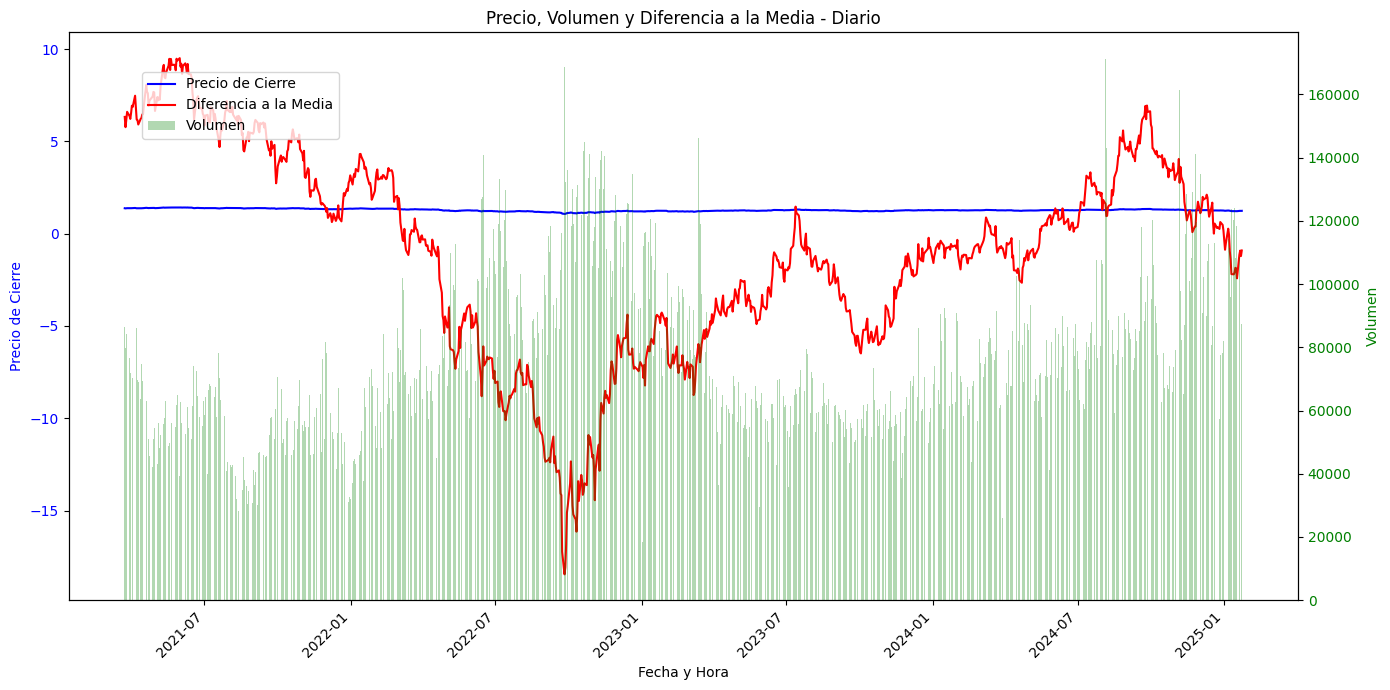

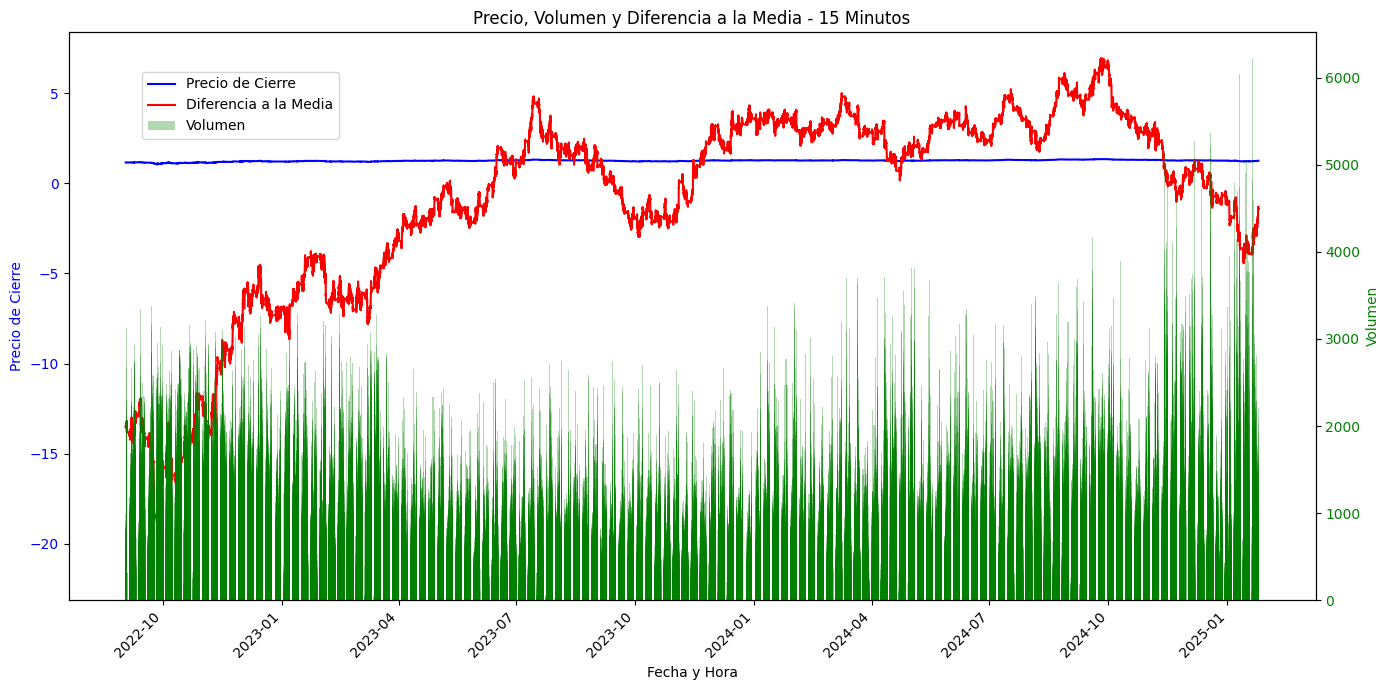

In [28]:
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario_nuevo.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_nuevo.head())

# Graficar el precio en función del tiempo y el volumen en forma de barras verticales
def graficar_precio_volumen_diferencia(df, titulo):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Graficar el precio de cierre
    ax1.plot(df['Time'], df['Close'], color='b', label='Precio de Cierre')
    ax1.set_xlabel('Fecha y Hora')
    ax1.set_ylabel('Precio de Cierre', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje y para el volumen
    ax2 = ax1.twinx()
    ax2.bar(df['Time'], df['Volume'], alpha=0.3, color='g', label='Volumen')
    ax2.set_ylabel('Volumen', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Graficar la diferencia a la media
    ax1.plot(df['Time'], df['diferencia_media'], color='r', label='Diferencia a la Media')

    # Rotar las etiquetas del eje x para mejor legibilidad
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Título y leyenda
    plt.title(titulo)
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.show()

# Graficar para los datos diarios
graficar_precio_volumen_diferencia(df_diario_nuevo, 'Precio, Volumen y Diferencia a la Media - Diario')

# Graficar para los datos de 15 minutos
graficar_precio_volumen_diferencia(df_15min_nuevo, 'Precio, Volumen y Diferencia a la Media - 15 Minutos')


Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2021-03-23  1.37532   86571          -0.797761          6.323102
1 2021-03-24  1.36814   79658          -0.522060          5.767296
2 2021-03-25  1.37322   84132           0.371307          6.158251
3 2021-03-26  1.37894   67955           0.416539          6.598091
4 2021-03-29  1.37611   76512          -0.205230          6.376822

Datos finales - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2022-09-02 00:00:00  1.15414      41          -0.023389        -13.526764
1 2022-09-02 00:15:00  1.15388     664          -0.022528        -13.545993
2 2022-09-02 00:30:00  1.15384     370          -0.003467        -13.548739
3 2022-09-02 00:45:00  1.15396     453           0.010400        -13.539498
4 2022-09-02 01:00:00  1.15396     380           0.000000        -13.539248


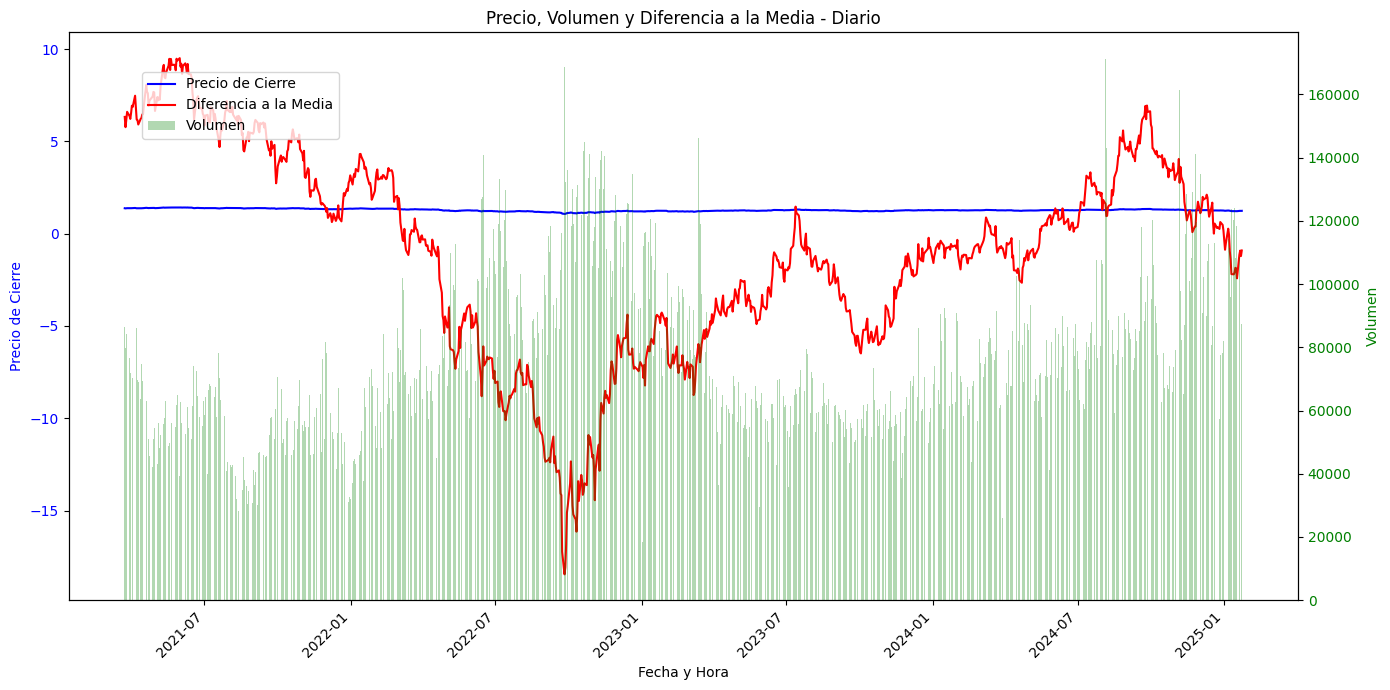

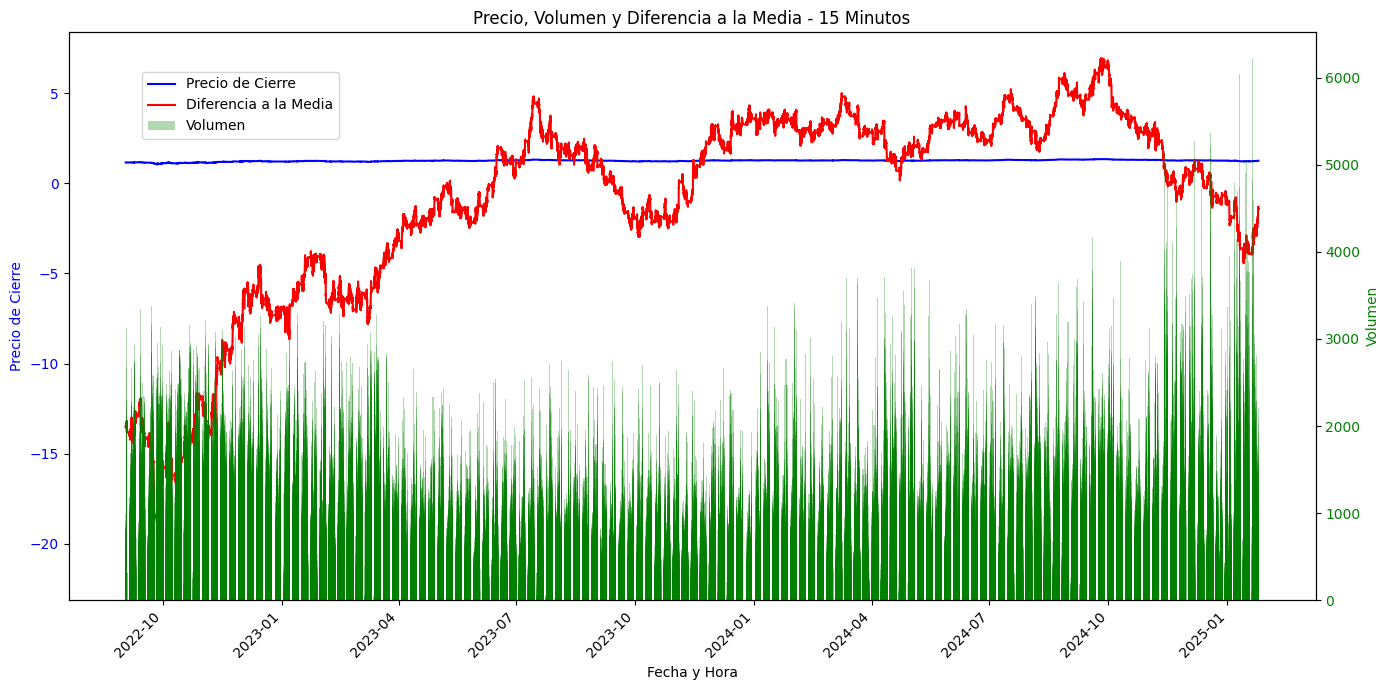

In [29]:
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario_nuevo.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_nuevo.head())

# Graficar el precio en función del tiempo y el volumen en forma de barras verticales
def graficar_precio_volumen_diferencia(df, titulo):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Graficar el precio de cierre
    ax1.plot(df['Time'], df['Close'], color='b', label='Precio de Cierre')
    ax1.set_xlabel('Fecha y Hora')
    ax1.set_ylabel('Precio de Cierre', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje y para el volumen
    ax2 = ax1.twinx()
    ax2.bar(df['Time'], df['Volume'], alpha=0.3, color='g', label='Volumen')
    ax2.set_ylabel('Volumen', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Graficar la diferencia a la media
    ax1.plot(df['Time'], df['diferencia_media'], color='r', label='Diferencia a la Media')

    # Rotar las etiquetas del eje x para mejor legibilidad
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Título y leyenda
    plt.title(titulo)
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.show()

# Graficar para los datos diarios
graficar_precio_volumen_diferencia(df_diario_nuevo, 'Precio, Volumen y Diferencia a la Media - Diario')

# Graficar para los datos de 15 minutos
graficar_precio_volumen_diferencia(df_15min_nuevo, 'Precio, Volumen y Diferencia a la Media - 15 Minutos')


Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2021-03-23  1.37532   86571          -0.797761          6.323102
1 2021-03-24  1.36814   79658          -0.522060          5.767296
2 2021-03-25  1.37322   84132           0.371307          6.158251
3 2021-03-26  1.37894   67955           0.416539          6.598091
4 2021-03-29  1.37611   76512          -0.205230          6.376822

Datos finales - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2022-09-02 00:00:00  1.15414      41          -0.023389        -13.526764
1 2022-09-02 00:15:00  1.15388     664          -0.022528        -13.545993
2 2022-09-02 00:30:00  1.15384     370          -0.003467        -13.548739
3 2022-09-02 00:45:00  1.15396     453           0.010400        -13.539498
4 2022-09-02 01:00:00  1.15396     380           0.000000        -13.539248


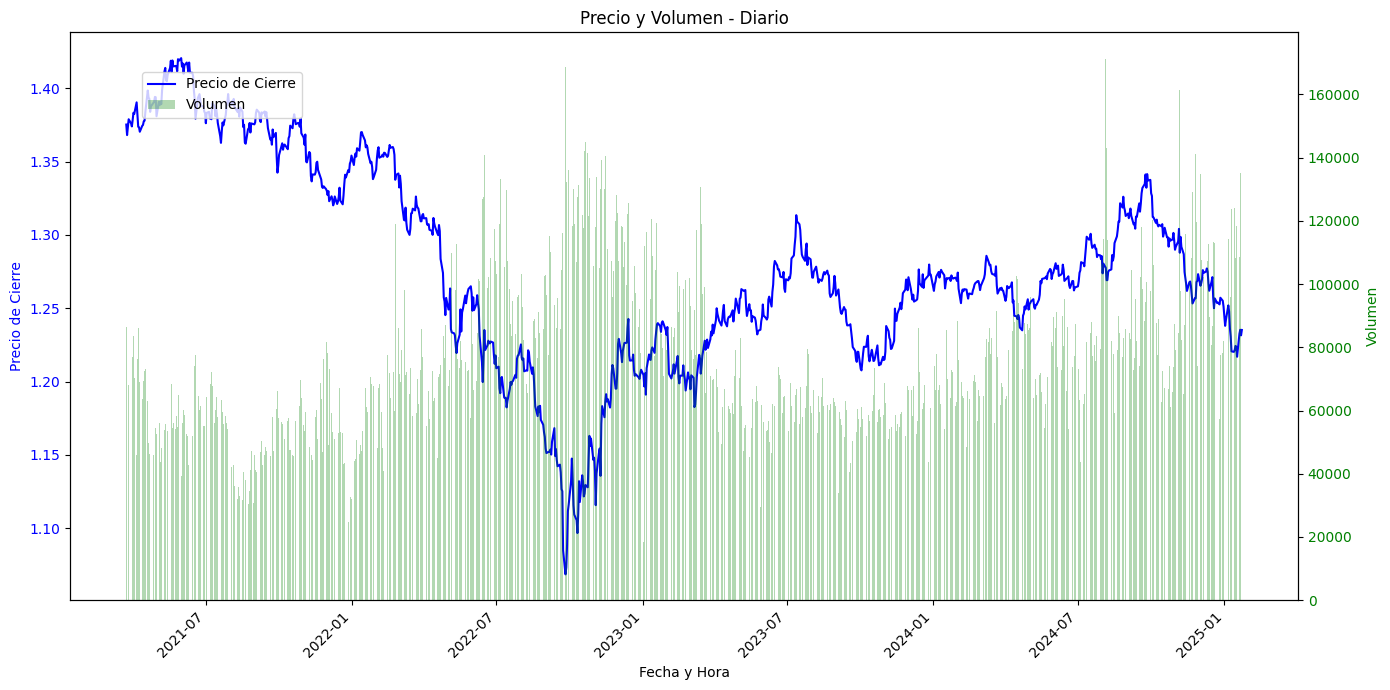

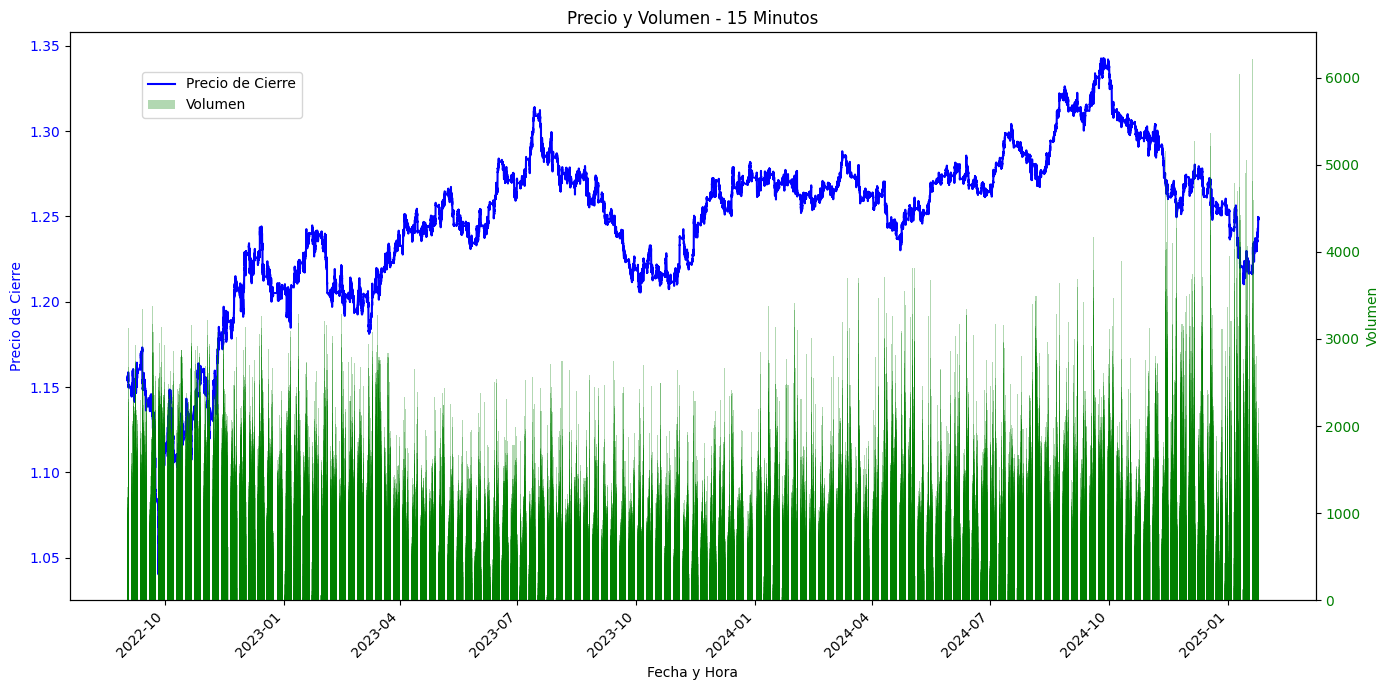

In [30]:
# Calcular la diferencia de precio a la media de 750 para el dataset diario
df_diario = calcular_diferencia_media(df_diario, 750)

# Calcular la diferencia de precio a la media de 45000 para el dataset de 15 minutos
df_15min = calcular_diferencia_media(df_15min, 45000)

# Quitar la columna de volumen relativo
if 'volumen_relativo' in df_diario.columns:
    df_diario.drop(columns=['volumen_relativo'], inplace=True)
if 'volumen_relativo' in df_15min.columns:
    df_15min.drop(columns=['volumen_relativo'], inplace=True)

# Reemplazar NaN con 0 en todo el DataFrame
df_diario.fillna(0, inplace=True)
df_15min.fillna(0, inplace=True)

# Crear nuevos datasets a partir del primer dato que sea diferente de 0 en el campo diferencia_media
df_diario_nuevo = df_diario[df_diario['diferencia_media'] != 0].reset_index(drop=True)
df_15min_nuevo = df_15min[df_15min['diferencia_media'] != 0].reset_index(drop=True)

# Imprimir los 5 primeros registros de los nuevos datasets resultantes
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario_nuevo.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_nuevo.head())

# Graficar el precio en función del tiempo y el volumen en forma de barras verticales
def graficar_precio_volumen(df, titulo):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Graficar el precio de cierre
    ax1.plot(df['Time'], df['Close'], color='b', label='Precio de Cierre')
    ax1.set_xlabel('Fecha y Hora')
    ax1.set_ylabel('Precio de Cierre', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje y para el volumen
    ax2 = ax1.twinx()
    ax2.bar(df['Time'], df['Volume'], alpha=0.3, color='g', label='Volumen')
    ax2.set_ylabel('Volumen', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Rotar las etiquetas del eje x para mejor legibilidad
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Título y leyenda
    plt.title(titulo)
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.show()

# Graficar para los datos diarios
graficar_precio_volumen(df_diario_nuevo, 'Precio y Volumen - Diario')

# Graficar para los datos de 15 minutos
graficar_precio_volumen(df_15min_nuevo, 'Precio y Volumen - 15 Minutos')


Datos copiados - Diario (diferencia de precio a la media de 750)
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2021-03-23  1.37532   86571          -0.797761          6.323102
1 2021-03-24  1.36814   79658          -0.522060          5.767296
2 2021-03-25  1.37322   84132           0.371307          6.158251
3 2021-03-26  1.37894   67955           0.416539          6.598091
4 2021-03-29  1.37611   76512          -0.205230          6.376822
5 2021-03-30  1.37404   71902          -0.150424          6.214799
6 2021-03-31  1.37830   76789           0.310035          6.541518
7 2021-04-01  1.38335   83580           0.366393          6.928717
8 2021-04-02  1.38255   70295          -0.057831          6.863476
9 2021-04-05  1.39045   45779           0.571408          7.470058

Datos copiados - 15 Minutos (diferencia de precio a la media de 45000)
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2022-09-02 00:00:00  1.15414      41          -

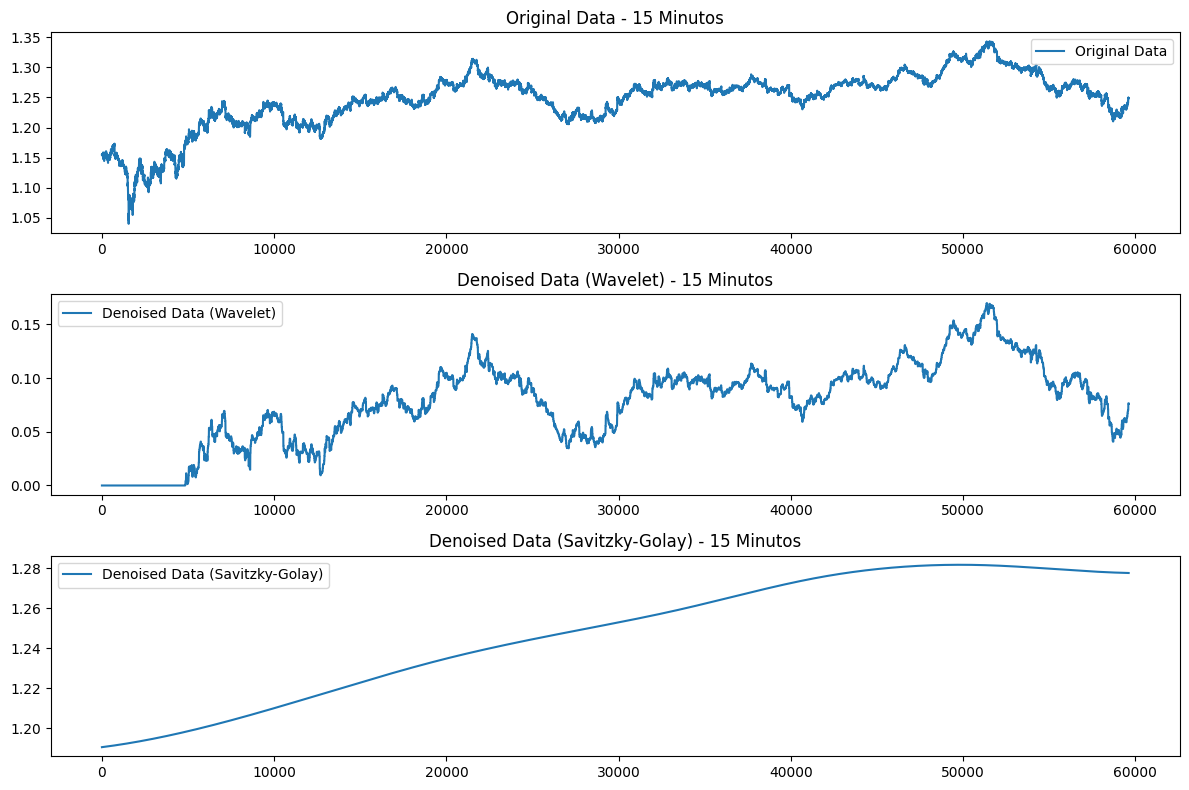

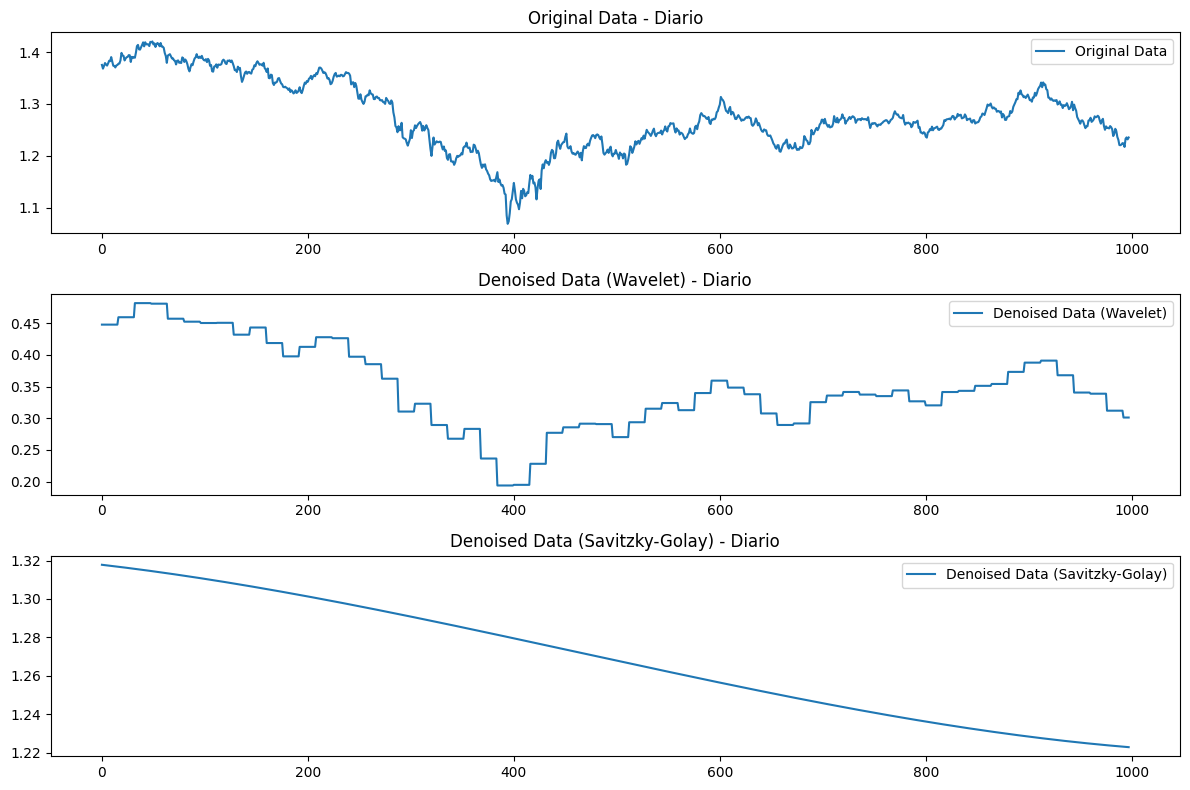

In [31]:
import numpy as np
import pywt
import pandas as pd
from scipy.signal import savgol_filter, hilbert
from PyEMD import EMD
import matplotlib.pyplot as plt

# Calcular la diferencia de precio a la media de 750 para el dataset diario
df_diario = calcular_diferencia_media(df_diario, 750)

# Calcular la diferencia de precio a la media de 45000 para el dataset de 15 minutos
df_15min = calcular_diferencia_media(df_15min, 45000)

# Quitar la columna de volumen relativo
if 'volumen_relativo' in df_diario.columns:
    df_diario.drop(columns=['volumen_relativo'], inplace=True)
if 'volumen_relativo' in df_15min.columns:
    df_15min.drop(columns=['volumen_relativo'], inplace=True)

# Reemplazar NaN con 0 en todo el DataFrame
df_diario.fillna(0, inplace=True)
df_15min.fillna(0, inplace=True)

# Crear nuevos datasets a partir del primer dato que sea diferente de 0 en el campo diferencia_media
df_diario_nuevo = df_diario[df_diario['diferencia_media'] != 0].reset_index(drop=True)
df_15min_nuevo = df_15min[df_15min['diferencia_media'] != 0].reset_index(drop=True)

# Crear copias de los datasets
df_diario_copia = df_diario_nuevo.copy()
df_15min_copia = df_15min_nuevo.copy()

# Imprimir los 10 primeros valores de los datasets copiados
print("\nDatos copiados - Diario (diferencia de precio a la media de 750)")
print(df_diario_copia.head(10))

print("\nDatos copiados - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_copia.head(10))

# Función para aplicar las transformaciones de denoising
def aplicar_transformaciones(data):
    # EMD
    emd = EMD()
    IMFs = emd.emd(data)
    residue = data - np.sum(IMFs, axis=0)

    # Aplicación de la Transformada de Hilbert (Hilbert Transform)
    analytic_signal = hilbert(IMFs[-1])
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))

    # Umbralización de Wavelet
    coeffs = pywt.wavedec(data, 'db1', level=4)
    threshold = np.sqrt(2 * np.log(len(data)))
    coeffs_thresholded = list(map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeffs))
    denoised_data_wavelet = pywt.waverec(coeffs_thresholded, 'db1')

    # Filtrado Savitzky-Golay aplicado a IMFs
    filtered_IMFs = savgol_filter(IMFs[-1], 11, 3)
    denoised_data_sg = residue + filtered_IMFs

    return data, denoised_data_wavelet, denoised_data_sg

# Aplicar las transformaciones a los datos de 15 minutos
data_15min = df_15min_copia['Close'].values
original_data_15min, denoised_data_wavelet_15min, denoised_data_sg_15min = aplicar_transformaciones(data_15min)

# Aplicar las transformaciones a los datos diarios
data_diario = df_diario_copia['Close'].values
original_data_diario, denoised_data_wavelet_diario, denoised_data_sg_diario = aplicar_transformaciones(data_diario)

# Graficar los resultados para los datos de 15 minutos
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(original_data_15min, label='Original Data')
plt.title('Original Data - 15 Minutos')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(denoised_data_wavelet_15min, label='Denoised Data (Wavelet)')
plt.title('Denoised Data (Wavelet) - 15 Minutos')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(denoised_data_sg_15min, label='Denoised Data (Savitzky-Golay)')
plt.title('Denoised Data (Savitzky-Golay) - 15 Minutos')
plt.legend()

plt.tight_layout()
plt.show()

# Graficar los resultados para los datos diarios
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(original_data_diario, label='Original Data')
plt.title('Original Data - Diario')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(denoised_data_wavelet_diario, label='Denoised Data (Wavelet)')
plt.title('Denoised Data (Wavelet) - Diario')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(denoised_data_sg_diario, label='Denoised Data (Savitzky-Golay)')
plt.title('Denoised Data (Savitzky-Golay) - Diario')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Imprimir los 5 primeros registros de los datasets originales
print("\nDatos originales - Diario")
print(df_diario.head())

print("\nDatos originales - 15 Minutos")
print(df_15min.head())

# Imprimir los 5 primeros registros de los nuevos datasets resultantes
print("\nDatos finales - Diario (diferencia de precio a la media de 750)")
print(df_diario_nuevo.head())

print("\nDatos finales - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_nuevo.head())

# Imprimir los 5 primeros valores de los datasets copiados
print("\nDatos copiados - Diario (diferencia de precio a la media de 750)")
print(df_diario_copia.head())

print("\nDatos copiados - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_copia.head())

# Imprimir los 5 primeros valores de los datos transformados
print("\nTransformed Data - Original 15 Minutes")
print(original_data_15min[:5])

print("\nTransformed Data - Denoised (Wavelet) 15 Minutes")
print(denoised_data_wavelet_15min[:5])

print("\nTransformed Data - Denoised (Savitzky-Golay) 15 Minutes")
print(denoised_data_sg_15min[:5])

print("\nTransformed Data - Original Daily")
print(original_data_diario[:5])

print("\nTransformed Data - Denoised (Wavelet) Daily")
print(denoised_data_wavelet_diario[:5])

print("\nTransformed Data - Denoised (Savitzky-Golay) Daily")
print(denoised_data_sg_diario[:5])


Datos originales - Diario
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2018-05-01  1.36140  203529           0.000000               0.0
1 2018-05-02  1.35707  271314          -0.318055               0.0
2 2018-05-03  1.35755  264578           0.035370               0.0
3 2018-05-04  1.35333  212521          -0.310854               0.0
4 2018-05-07  1.35571  190496           0.175863               0.0

Datos originales - 15 Minutos
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2020-11-11 09:00:00  1.32844    1065           0.000000               0.0
1 2020-11-11 09:15:00  1.32803     823          -0.030863               0.0
2 2020-11-11 09:30:00  1.32760    1093          -0.032379               0.0
3 2020-11-11 09:45:00  1.32766    1224           0.004519               0.0
4 2020-11-11 10:00:00  1.32921    1796           0.116747               0.0

Datos finales - Diario (diferencia de precio a la media de 750)
        Time    Clo

In [33]:
# Convertir los datos transformados a DataFrames
df_original_15min = pd.DataFrame(original_data_15min, columns=['Original'])
df_denoised_wavelet_15min = pd.DataFrame(denoised_data_wavelet_15min, columns=['Denoised_Wavelet'])
df_denoised_sg_15min = pd.DataFrame(denoised_data_sg_15min, columns=['Denoised_SG'])

df_original_diario = pd.DataFrame(original_data_diario, columns=['Original'])
df_denoised_wavelet_diario = pd.DataFrame(denoised_data_wavelet_diario, columns=['Denoised_Wavelet'])
df_denoised_sg_diario = pd.DataFrame(denoised_data_sg_diario, columns=['Denoised_SG'])

# Imprimir las primeras 5 líneas de cada DataFrame
print("\nTransformed DataFrame - Original 15 Minutes")
print(df_original_15min.head())

print("\nTransformed DataFrame - Denoised (Wavelet) 15 Minutes")
print(df_denoised_wavelet_15min.head())

print("\nTransformed DataFrame - Denoised (Savitzky-Golay) 15 Minutes")
print(df_denoised_sg_15min.head())

print("\nTransformed DataFrame - Original Daily")
print(df_original_diario.head())

print("\nTransformed DataFrame - Denoised (Wavelet) Daily")
print(df_denoised_wavelet_diario.head())

print("\nTransformed DataFrame - Denoised (Savitzky-Golay) Daily")
print(df_denoised_sg_diario.head())


Transformed DataFrame - Original 15 Minutes
   Original
0   1.15414
1   1.15388
2   1.15384
3   1.15396
4   1.15396

Transformed DataFrame - Denoised (Wavelet) 15 Minutes
   Denoised_Wavelet
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0

Transformed DataFrame - Denoised (Savitzky-Golay) 15 Minutes
   Denoised_SG
0     1.190482
1     1.190483
2     1.190484
3     1.190485
4     1.190486

Transformed DataFrame - Original Daily
   Original
0   1.37532
1   1.36814
2   1.37322
3   1.37894
4   1.37611

Transformed DataFrame - Denoised (Wavelet) Daily
   Denoised_Wavelet
0          0.447781
1          0.447781
2          0.447781
3          0.447781
4          0.447781

Transformed DataFrame - Denoised (Savitzky-Golay) Daily
   Denoised_SG
0     1.317787
1     1.317725
2     1.317662
3     1.317599
4     1.317536


In [34]:
# Imprimir los 5 primeros registros de los datasets originales
print("\nDatos originales - 15 Minutos")
print(df_15min.head())

print("\nDatos originales - Diario")
print(df_diario.head())


Datos originales - 15 Minutos
                 Time    Close  Volume  cambio_porcentual  diferencia_media
0 2020-11-11 09:00:00  1.32844    1065           0.000000               0.0
1 2020-11-11 09:15:00  1.32803     823          -0.030863               0.0
2 2020-11-11 09:30:00  1.32760    1093          -0.032379               0.0
3 2020-11-11 09:45:00  1.32766    1224           0.004519               0.0
4 2020-11-11 10:00:00  1.32921    1796           0.116747               0.0

Datos originales - Diario
        Time    Close  Volume  cambio_porcentual  diferencia_media
0 2018-05-01  1.36140  203529           0.000000               0.0
1 2018-05-02  1.35707  271314          -0.318055               0.0
2 2018-05-03  1.35755  264578           0.035370               0.0
3 2018-05-04  1.35333  212521          -0.310854               0.0
4 2018-05-07  1.35571  190496           0.175863               0.0


In [35]:
# Filtrar los datos que comienzan a ser distintos de 0 en la columna diferencia_media
df_diario_filtrado = df_diario[df_diario['diferencia_media'] != 0].reset_index(drop=True)
df_15min_filtrado = df_15min[df_15min['diferencia_media'] != 0].reset_index(drop=True)

# Hacer una copia de los datos filtrados
df_diario_copia = df_diario_filtrado.copy()
df_15min_copia = df_15min_filtrado.copy()

# Eliminar la columna Time
df_diario_copia.drop(columns=['Time'], inplace=True)
df_15min_copia.drop(columns=['Time'], inplace=True)

# Imprimir las primeras 5 líneas de cada DataFrame copiado
print("\nDatos copiados - Diario (diferencia de precio a la media de 750)")
print(df_diario_copia.head())

print("\nDatos copiados - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_copia.head())


Datos copiados - Diario (diferencia de precio a la media de 750)
     Close  Volume  cambio_porcentual  diferencia_media
0  1.37532   86571          -0.797761          6.323102
1  1.36814   79658          -0.522060          5.767296
2  1.37322   84132           0.371307          6.158251
3  1.37894   67955           0.416539          6.598091
4  1.37611   76512          -0.205230          6.376822

Datos copiados - 15 Minutos (diferencia de precio a la media de 45000)
     Close  Volume  cambio_porcentual  diferencia_media
0  1.15414      41          -0.023389        -13.526764
1  1.15388     664          -0.022528        -13.545993
2  1.15384     370          -0.003467        -13.548739
3  1.15396     453           0.010400        -13.539498
4  1.15396     380           0.000000        -13.539248


In [36]:
# Filtrar los datos que comienzan a ser distintos de 0 en la columna diferencia_media
df_diario_filtrado = df_diario[df_diario['diferencia_media'] != 0].reset_index(drop=True)
df_15min_filtrado = df_15min[df_15min['diferencia_media'] != 0].reset_index(drop=True)

# Hacer una copia de los datos filtrados
df_diario_copia = df_diario_filtrado.copy()
df_15min_copia = df_15min_filtrado.copy()

# Eliminar la columna Time
df_diario_copia.drop(columns=['Time'], inplace=True)
df_15min_copia.drop(columns=['Time'], inplace=True)

# Imprimir las primeras 5 líneas de cada DataFrame copiado
print("\nDatos copiados - Diario (diferencia de precio a la media de 750)")
print(df_diario_copia.head())

print("\nDatos copiados - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_copia.head())


Datos copiados - Diario (diferencia de precio a la media de 750)
     Close  Volume  cambio_porcentual  diferencia_media
0  1.37532   86571          -0.797761          6.323102
1  1.36814   79658          -0.522060          5.767296
2  1.37322   84132           0.371307          6.158251
3  1.37894   67955           0.416539          6.598091
4  1.37611   76512          -0.205230          6.376822

Datos copiados - 15 Minutos (diferencia de precio a la media de 45000)
     Close  Volume  cambio_porcentual  diferencia_media
0  1.15414      41          -0.023389        -13.526764
1  1.15388     664          -0.022528        -13.545993
2  1.15384     370          -0.003467        -13.548739
3  1.15396     453           0.010400        -13.539498
4  1.15396     380           0.000000        -13.539248


In [38]:
from sklearn.preprocessing import StandardScaler

# Filtrar los datos que comienzan a ser distintos de 0 en la columna diferencia_media
df_diario_filtrado = df_diario[df_diario['diferencia_media'] != 0].reset_index(drop=True)
df_15min_filtrado = df_15min[df_15min['diferencia_media'] != 0].reset_index(drop=True)

# Hacer una copia de los datos filtrados
df_diario_copia = df_diario_filtrado.copy()
df_15min_copia = df_15min_filtrado.copy()

# Eliminar la columna Time
df_diario_copia.drop(columns=['Time'], inplace=True)
df_15min_copia.drop(columns=['Time'], inplace=True)

# Normalizar las columnas
scaler = StandardScaler()
df_diario_copia_normalizado = pd.DataFrame(scaler.fit_transform(df_diario_copia), columns=df_diario_copia.columns)
df_15min_copia_normalizado = pd.DataFrame(scaler.fit_transform(df_15min_copia), columns=df_15min_copia.columns)

# Imprimir las primeras 5 líneas de cada DataFrame copiado y normalizado
print("\nDatos copiados y normalizados - Diario (diferencia de precio a la media de 750)")
print(df_diario_copia_normalizado.head())

print("\nDatos copiados y normalizados - 15 Minutos (diferencia de precio a la media de 45000)")
print(df_15min_copia_normalizado.head())


Datos copiados y normalizados - Diario (diferencia de precio a la media de 750)
      Close    Volume  cambio_porcentual  diferencia_media
0  1.440525  0.436748          -1.423014          1.359000
1  1.334862  0.158131          -0.924965          1.256740
2  1.409620  0.338448           0.688888          1.328670
3  1.493798 -0.313539           0.770599          1.409594
4  1.452151  0.031337          -0.352617          1.368884

Datos copiados y normalizados - 15 Minutos (diferencia de precio a la media de 45000)
      Close    Volume  cambio_porcentual  diferencia_media
0 -2.013353 -1.497883          -0.376733         -2.339121
1 -2.019004 -0.342729          -0.362954         -2.342688
2 -2.019873 -0.887858          -0.057895         -2.343198
3 -2.017265 -0.733961           0.164030         -2.341483
4 -2.017265 -0.869316          -0.002416         -2.341437


In [39]:
import gym
import numpy as np
import pandas as pd
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from sklearn.preprocessing import StandardScaler

# Definir el entorno StockTradingEnv
class StockTradingEnv(gym.Env):
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        self.df = df
        self.action_space = gym.spaces.Discrete(3)  # Buy, Hold, Sell
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(df.shape[1],), dtype=np.float32)
        self.current_step = 0
        self.balance = 10000
        self.shares_held = 0
        self.net_worth = 10000

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = 0
        self.balance = 10000
        self.shares_held = 0
        self.net_worth = 10000
        return self._next_observation().astype(np.float32), {}

    def _next_observation(self):
        return self.df.iloc[self.current_step].values

    def step(self, action):
        self.current_step += 1
        reward = self.net_worth - 10000
        done = self.current_step >= len(self.df) - 1
        obs = self._next_observation().astype(np.float32)
        terminated = done
        truncated = False
        info = {}
        return obs, reward, terminated, truncated, info

    def render(self, mode='human'):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Net worth: {self.net_worth}')

# Preparar los datos normalizados
scaler = StandardScaler()
df_diario_normalizado = pd.DataFrame(scaler.fit_transform(df_diario_copia), columns=df_diario_copia.columns)
df_15min_normalizado = pd.DataFrame(scaler.fit_transform(df_15min_copia), columns=df_15min_copia.columns)

# Crear el entorno con los datos normalizados
env_diario = StockTradingEnv(df_diario_normalizado)
env_15min = StockTradingEnv(df_15min_normalizado)

# Verificar el entorno
check_env(env_diario)
check_env(env_15min)

# Configurar y entrenar el algoritmo PPO
model_diario = PPO("MlpPolicy", env_diario, verbose=1)
model_15min = PPO("MlpPolicy", env_15min, verbose=1)

# Entrenar el modelo
model_diario.learn(total_timesteps=10000)
model_15min.learn(total_timesteps=10000)

# Guardar los modelos entrenados
model_diario.save("ppo_stock_trading_diario")
model_15min.save("ppo_stock_trading_15min")

# Cargar y evaluar los modelos
model_diario = PPO.load("ppo_stock_trading_diario")
model_15min = PPO.load("ppo_stock_trading_15min")

# Evaluar el modelo en el entorno diario
obs = env_diario.reset()
for _ in range(len(df_diario_normalizado)):
    action, _states = model_diario.predict(obs)
    obs, rewards, done, truncated, info = env_diario.step(action)
    if done:
        break
env_diario.render()

# Evaluar el modelo en el entorno de 15 minutos
obs = env_15min.reset()
for _ in range(len(df_15min_normalizado)):
    action, _states = model_15min.predict(obs)
    obs, rewards, done, truncated, info = env_15min.step(action)
    if done:
        break
env_15min.render()

AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [40]:
class StockTradingEnv(gym.Env):
    # ...existing code...
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        self.df = df
        self.action_space = gym.spaces.Discrete(3)  # Buy, Hold, Sell
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(df.shape[1],), dtype=np.float32)
        self.current_step = 0
        self.balance = 10000
        self.shares_held = 0
        self.net_worth = 10000

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = 0
        self.balance = 10000
        self.shares_held = 0
        self.net_worth = 10000
        return self._next_observation().astype(np.float32), {}

    def _next_observation(self):
        return self.df.iloc[self.current_step].values

    def step(self, action):
        # ...existing code...
        self.current_step += 1
        reward = self.net_worth - 10000
        done = self.current_step >= len(self.df) - 1
        obs = self._next_observation().astype(np.float32)
        terminated = done
        truncated = False
        info = {}
        return obs, reward, terminated, truncated, info

    def render(self, mode='human'):
        # ...existing code...
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Net worth: {self.net_worth}')


In [41]:
# Create and check environment
env = StockTradingEnv(df_diario_copia_normalizado)
check_env(env)


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [29]:
# Vectorize environment
vec_env = DummyVecEnv([lambda: env])

In [30]:
# Train model
model = PPO('MlpPolicy', vec_env, verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1176 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 768        |
|    iterations           | 2          |
|    time_elapsed         | 5          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00883119 |
|    clip_fraction        | 0.0323     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.09      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0167     |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.00136   |
|    value_loss           | 0.00104    |
----------------------------------------
-----------------------------------

In [31]:
# Save model
model.save("ppo_stock_trading")


In [32]:
# Load model
model = PPO.load("ppo_stock_trading")

In [38]:
# Test model
obs = vec_env.reset()
net_worths = []
for i in range(len(df)):
    action, _states = model.predict(obs)
    obs, rewards, terminated, truncated = vec_env.step(action)
    net_worths.append(vec_env.envs[0].net_worth)
    vec_env.render()


c:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


In [42]:
import gymnasium as gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from stable_baselines3 import A2C  # Import A2C instead of SAC
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_checker import check_env